In [2]:
import pandas as pd

# Ruta relativa al archivo que está en el nivel superior
file_path = "../phishing_train.xlsx"  
df_train = pd.read_excel(file_path)

# Mostrar las primeras filas para verificar que se cargó correctamente
print(df_train.head())


   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0         34            29           0   ca          100.000000   
1         25            18           0  org          100.000000   
2         71            24           0   es           34.626065   
3         30            23           0  com          100.000000   
4         27            18           0  com          100.000000   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              0.666667           0.010183     0.044248          2   
1              1.000000           0.079963     0.048271          3   
2              1.000000           0.006411     0.030641          2   
3              1.000000           0.522907     0.046835          3   
4              1.000000           0.522907     0.050666          3   

   NoOfSubDomain  ...  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  \
0              3  ...    0       0                 1         47        7   
1              1  ...   

In [3]:
# 1. Información básica del DataFrame
print("Información básica del DataFrame:")
print(df_train.info())  # Información sobre tipos de datos y valores nulos


Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   100000 non-null  int64  
 1   DomainLength                100000 non-null  int64  
 2   IsDomainIP                  100000 non-null  int64  
 3   TLD                         100000 non-null  object 
 4   URLSimilarityIndex          100000 non-null  float64
 5   CharContinuationRate        100000 non-null  float64
 6   TLDLegitimateProb           100000 non-null  float64
 7   URLCharProb                 100000 non-null  float64
 8   TLDLength                   100000 non-null  int64  
 9   NoOfSubDomain               100000 non-null  int64  
 10  HasObfuscation              100000 non-null  int64  
 11  NoOfObfuscatedChar          100000 non-null  int64  
 12  ObfuscationRatio            100000 non-

In [4]:
# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_train.describe())  # Estadísticas para variables numéricas



Estadísticas descriptivas:
           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean       34.456400      21.464060       0.002520           78.392491   
std        39.462942       9.254954       0.050137           28.993152   
min        10.000000       1.000000       0.000000            0.304877   
25%        23.000000      16.000000       0.000000           56.895485   
50%        28.000000      20.000000       0.000000          100.000000   
75%        34.000000      25.000000       0.000000          100.000000   
max      4272.000000     103.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         100000.000000      100000.000000  100000.000000  100000.000000   
mean               0.845522           0.259652       0.041820       2.763010   
std                0.216843           0.251607       0.008651    

In [5]:
# 3. Verificar valores nulos
print("\nValores nulos por columna:")
print(df_train.isnull().sum())  # Conteo de valores nulos por columna



Valores nulos por columna:
URLLength                     0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive

In [6]:
# 4. Distribución de la variable objetivo
print("\nDistribución de la variable objetivo ('label'):")
print(df_train['label'].value_counts(normalize=True) * 100)  # Distribución en porcentajes



Distribución de la variable objetivo ('label'):
1    57.153
0    42.847
Name: label, dtype: float64


C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\2928774445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='viridis')


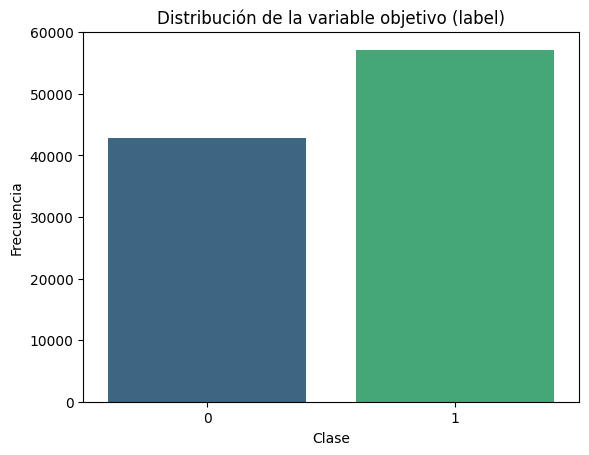

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualización de la distribución de la variable objetivo
sns.countplot(x='label', data=df_train, palette='viridis')
plt.title("Distribución de la variable objetivo (label)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\306895540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()



Matriz de correlación (variables numéricas):
                            URLLength  DomainLength  IsDomainIP  \
URLLength                    1.000000      0.249870    0.269500   
DomainLength                 0.249870      1.000000   -0.038059   
IsDomainIP                   0.269500     -0.038059    1.000000   
URLSimilarityIndex          -0.432939     -0.419048   -0.116413   
CharContinuationRate        -0.247752     -0.576162   -0.097295   
TLDLegitimateProb           -0.013024      0.026968   -0.051030   
URLCharProb                 -0.249240     -0.177264   -0.106063   
TLDLength                    0.039770      0.152241   -0.012458   
NoOfSubDomain                0.069859      0.397806    0.084768   
HasObfuscation               0.186701      0.040092    0.002083   
NoOfObfuscatedChar           0.561897      0.010859    0.000518   
ObfuscationRatio             0.148707      0.022071    0.001594   
NoOfLettersInURL             0.944336      0.305797    0.254811   
LetterRatioInURL

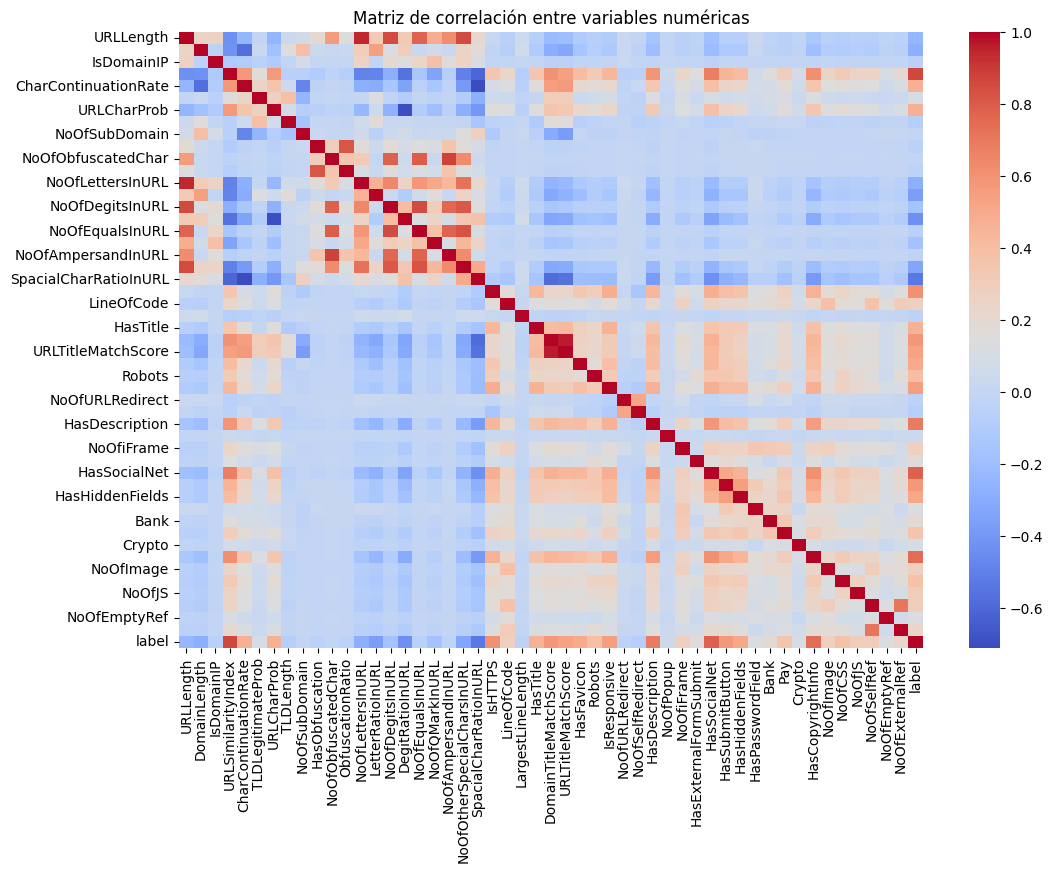

In [8]:
# 5. Correlación entre variables numéricas
correlation_matrix = df_train.corr()
print("\nMatriz de correlación (variables numéricas):")
print(correlation_matrix)
# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


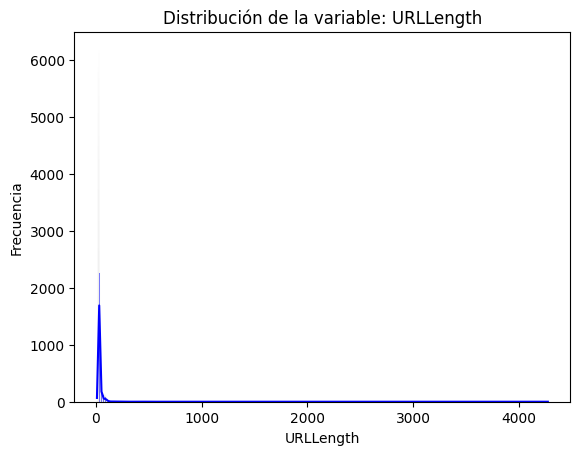

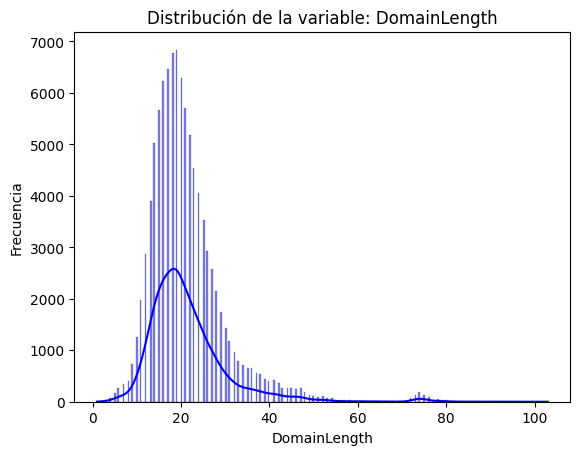

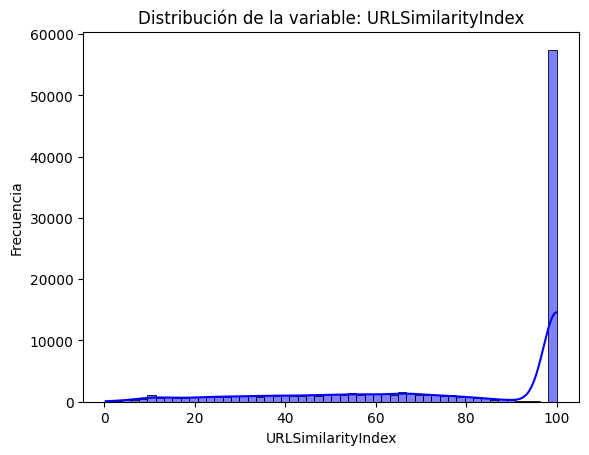

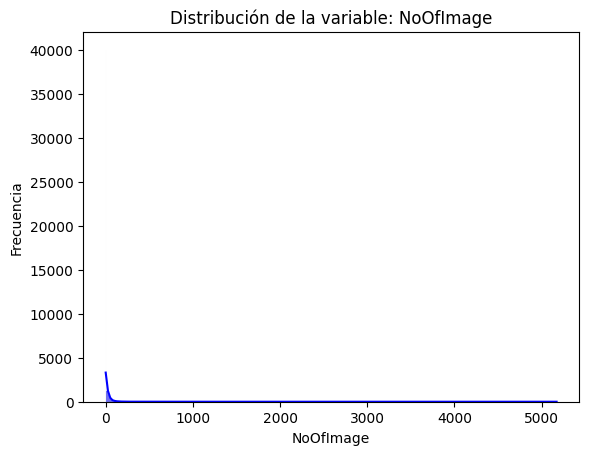

In [9]:
# 6. Histogramas de variables importantes
variables_importantes = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'NoOfImage']
for var in variables_importantes:
    plt.figure()
    sns.histplot(df_train[var], kde=True, color="blue")
    plt.title(f"Distribución de la variable: {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

In [10]:
# Verificar duplicados en el DataFrame
duplicados = df_train.duplicated()
print(f"Cantidad de filas duplicadas: {duplicados.sum()}")

# Mostrar las filas duplicadas
filas_duplicadas = df_train[duplicados]
print(filas_duplicadas)

Cantidad de filas duplicadas: 0
Empty DataFrame
Columns: [URLLength, DomainLength, IsDomainIP, TLD, URLSimilarityIndex, CharContinuationRate, TLDLegitimateProb, URLCharProb, TLDLength, NoOfSubDomain, HasObfuscation, NoOfObfuscatedChar, ObfuscationRatio, NoOfLettersInURL, LetterRatioInURL, NoOfDegitsInURL, DegitRatioInURL, NoOfEqualsInURL, NoOfQMarkInURL, NoOfAmpersandInURL, NoOfOtherSpecialCharsInURL, SpacialCharRatioInURL, IsHTTPS, LineOfCode, LargestLineLength, HasTitle, DomainTitleMatchScore, URLTitleMatchScore, HasFavicon, Robots, IsResponsive, NoOfURLRedirect, NoOfSelfRedirect, HasDescription, NoOfPopup, NoOfiFrame, HasExternalFormSubmit, HasSocialNet, HasSubmitButton, HasHiddenFields, HasPasswordField, Bank, Pay, Crypto, HasCopyrightInfo, NoOfImage, NoOfCSS, NoOfJS, NoOfSelfRef, NoOfEmptyRef, NoOfExternalRef, label]
Index: []

[0 rows x 52 columns]


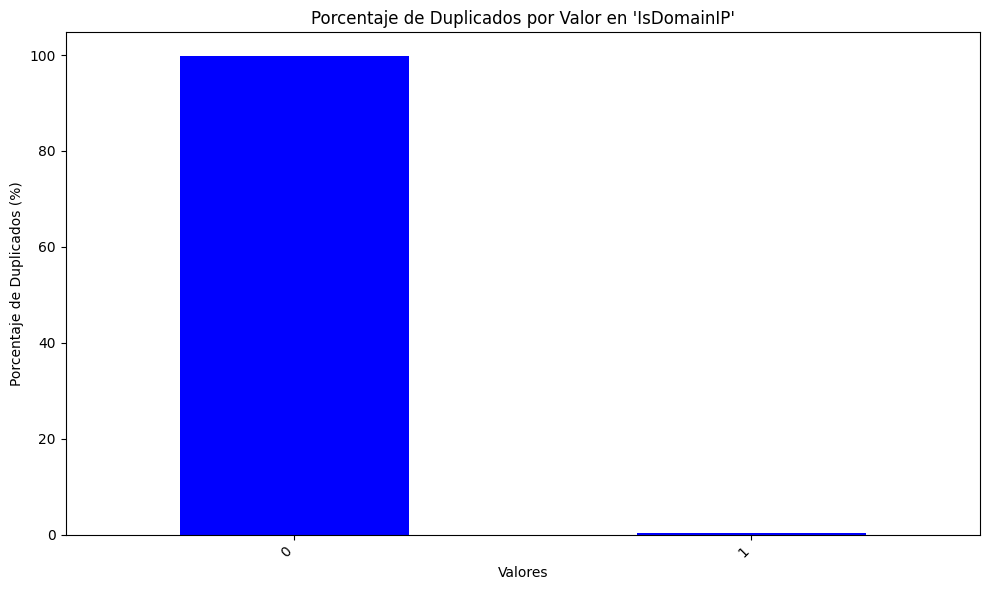

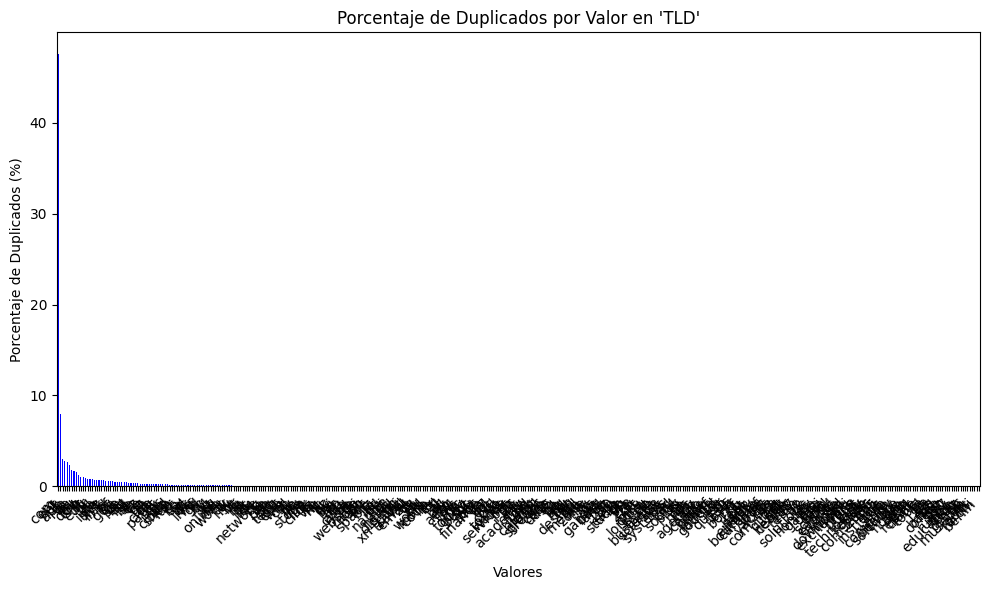

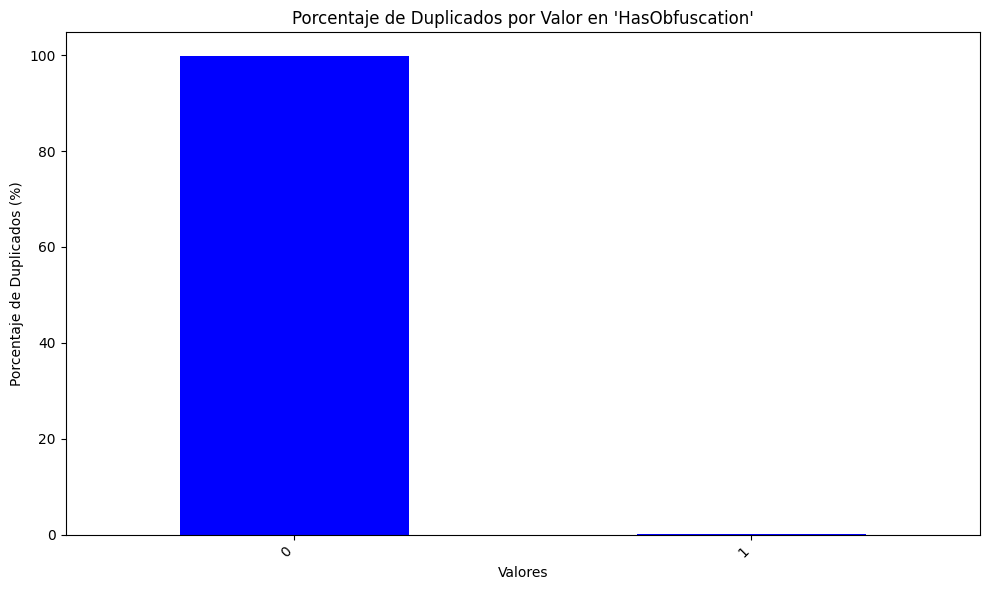

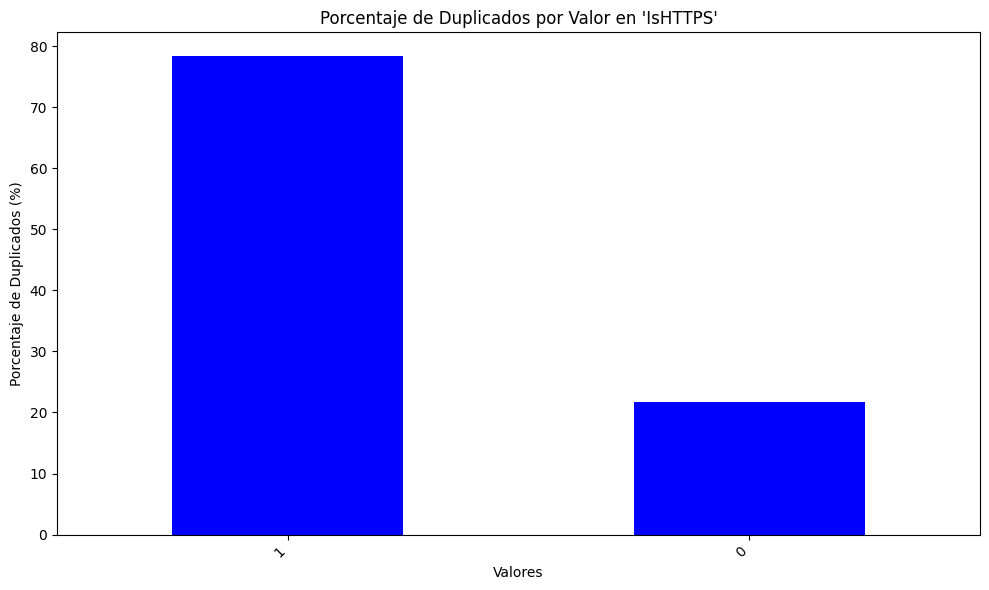

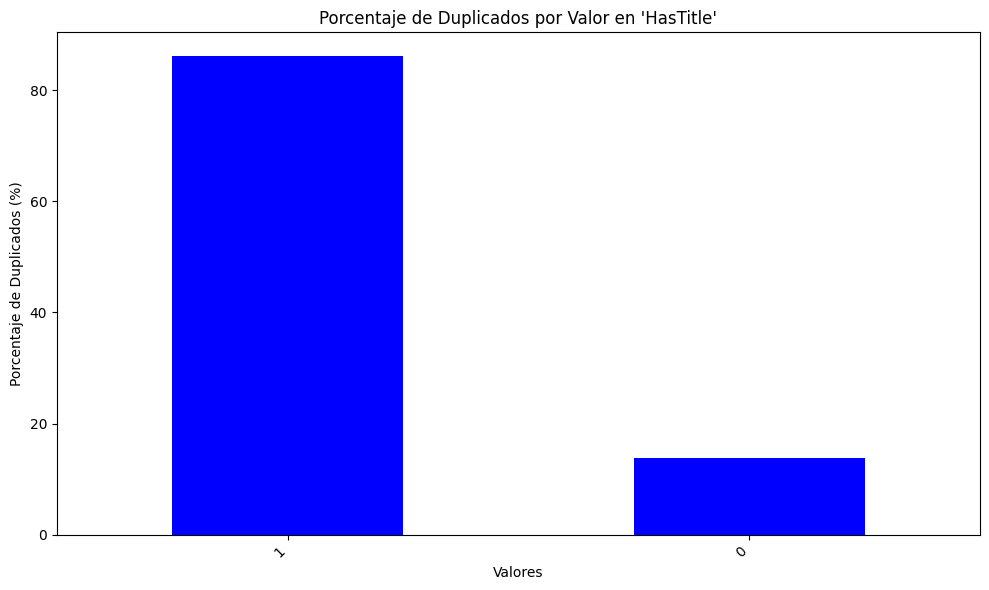

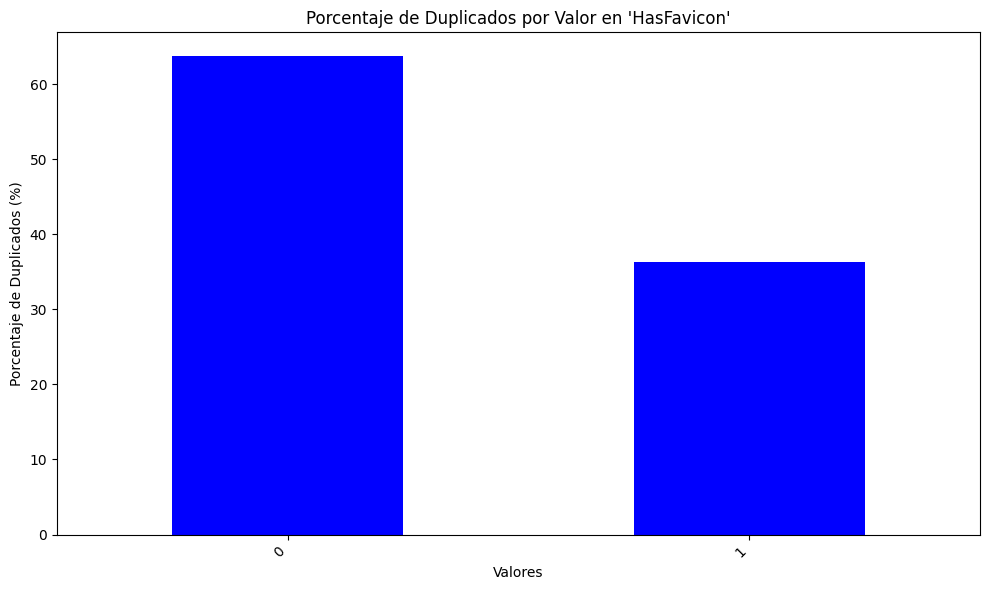

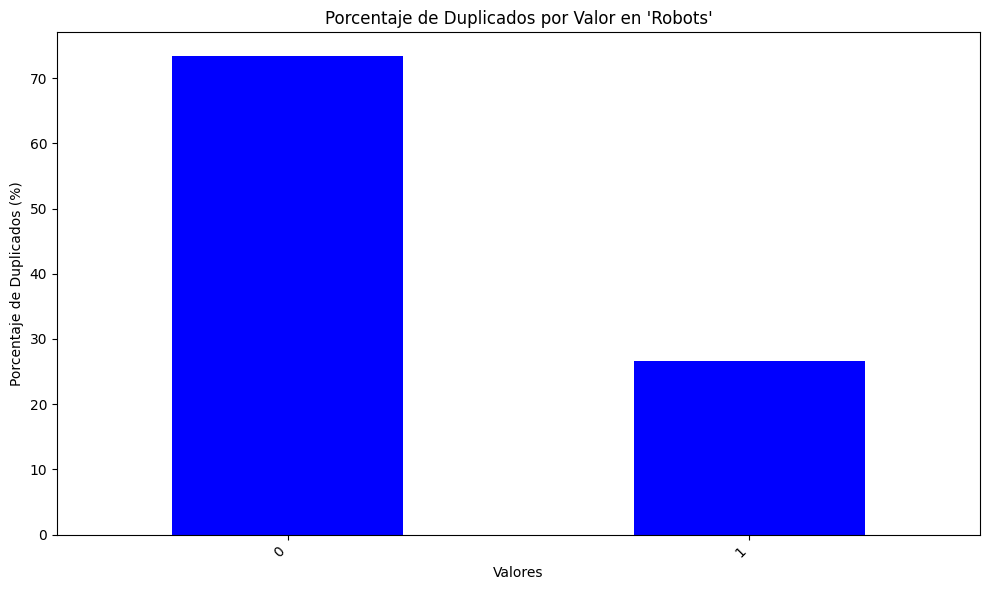

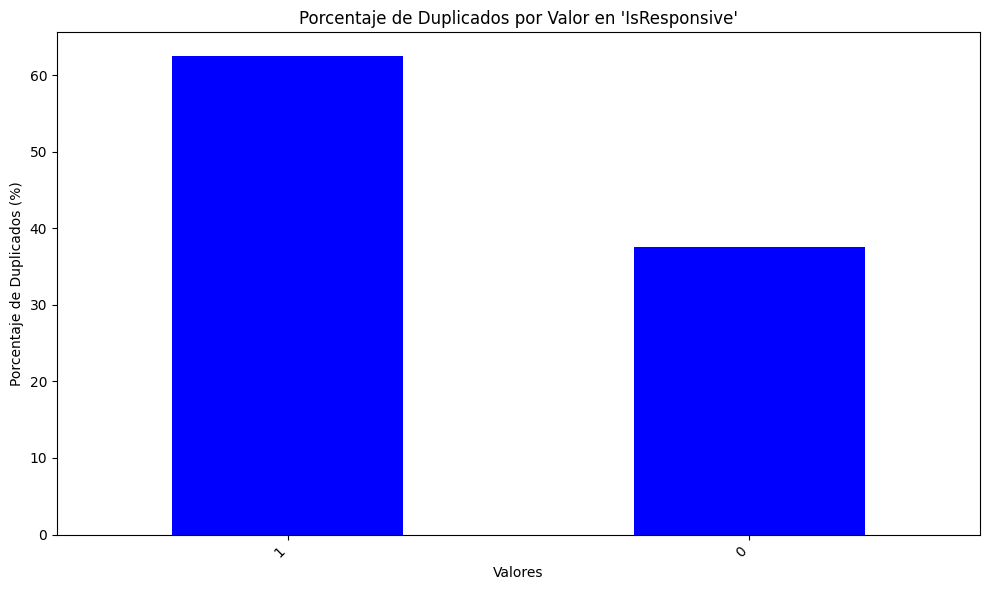

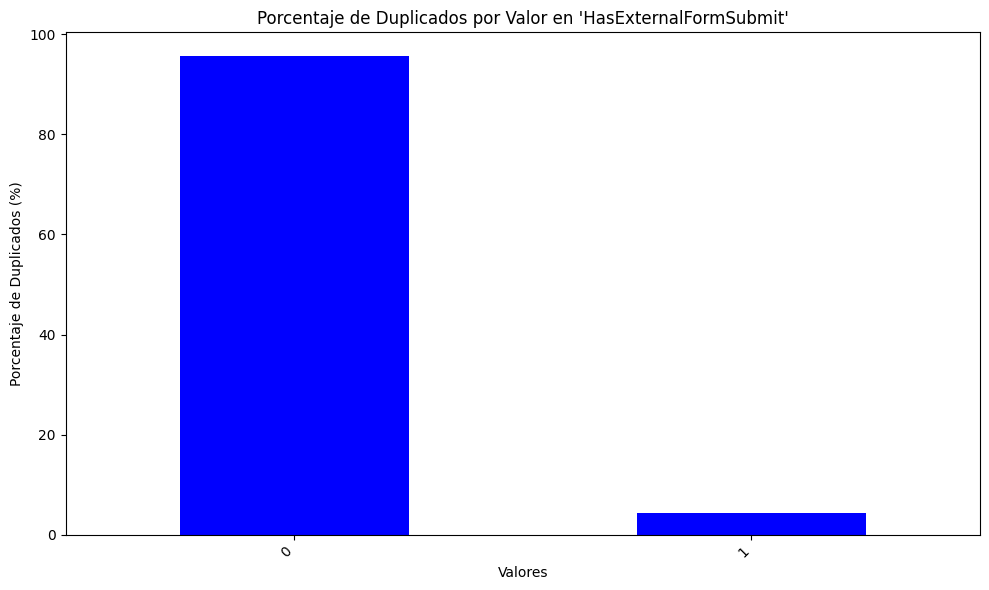

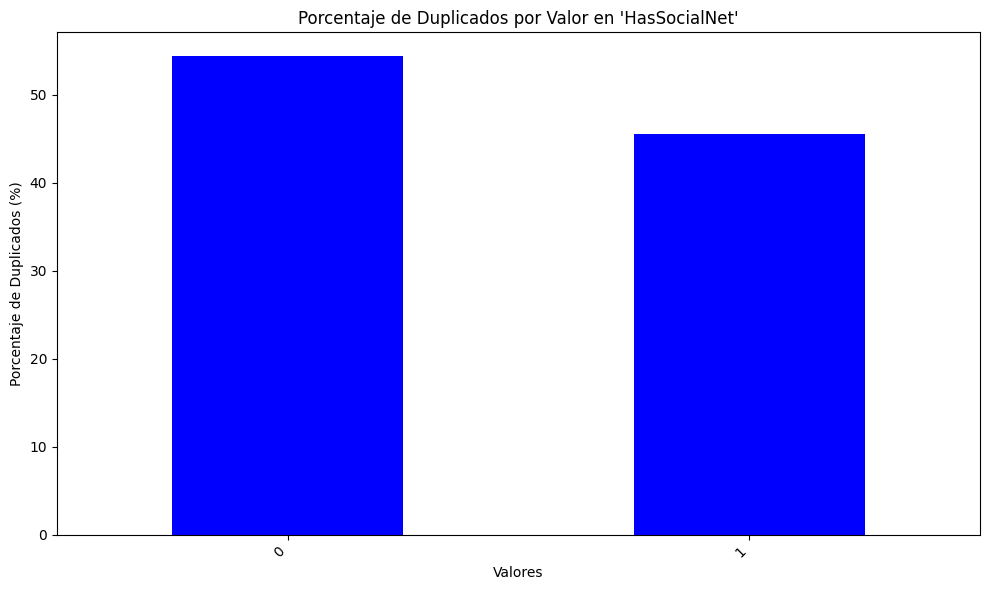

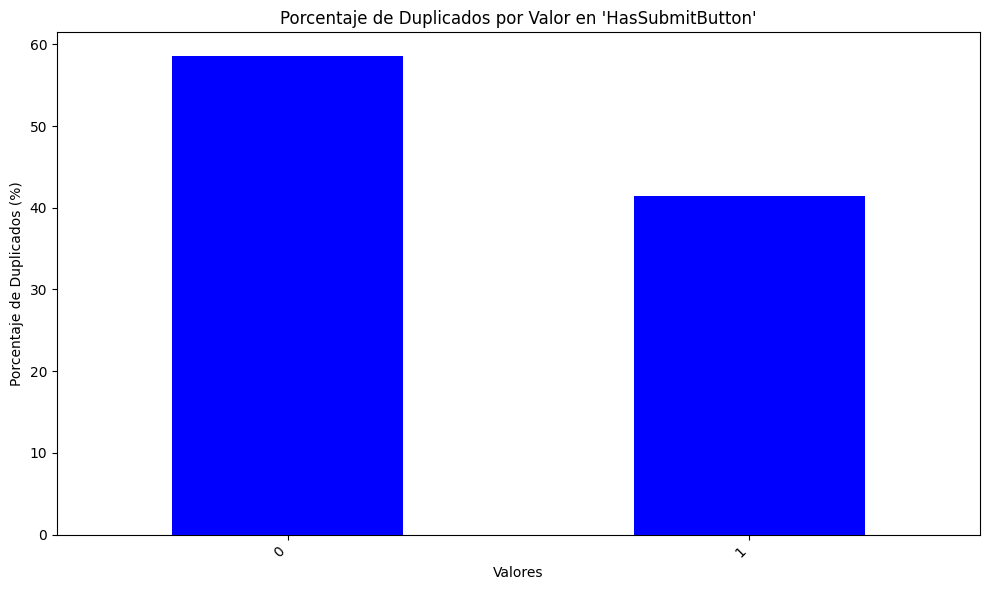

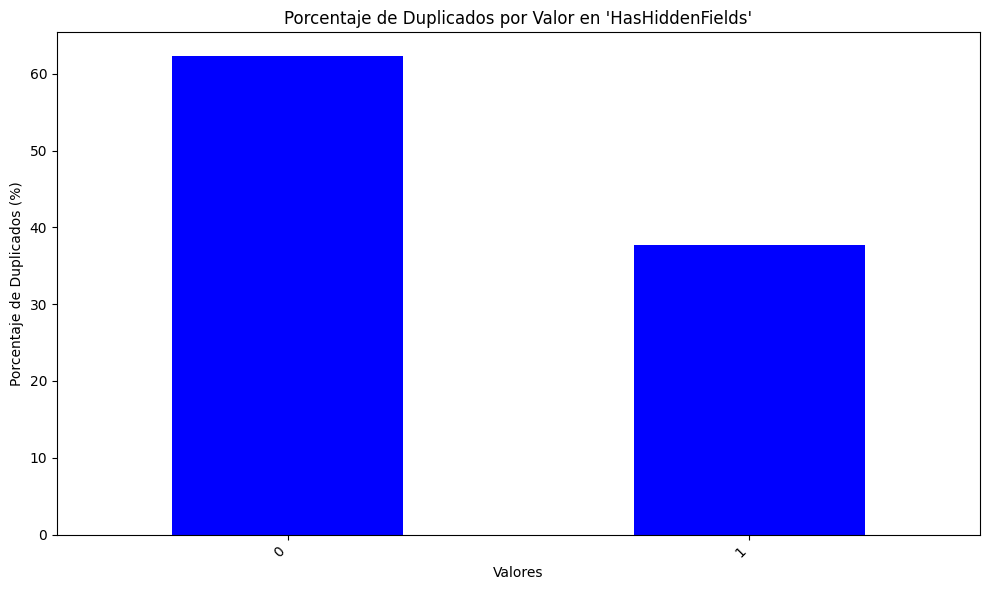

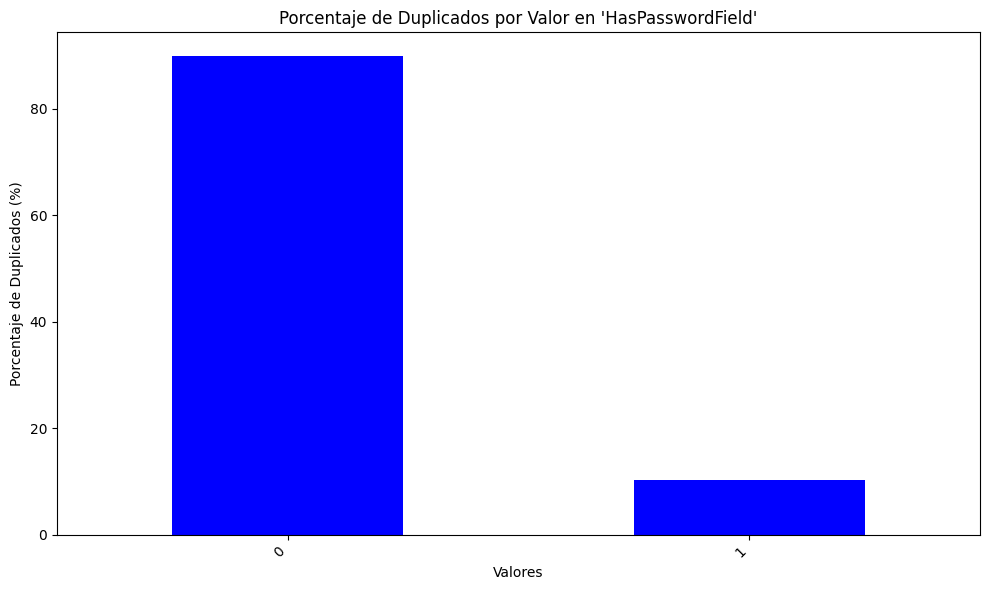

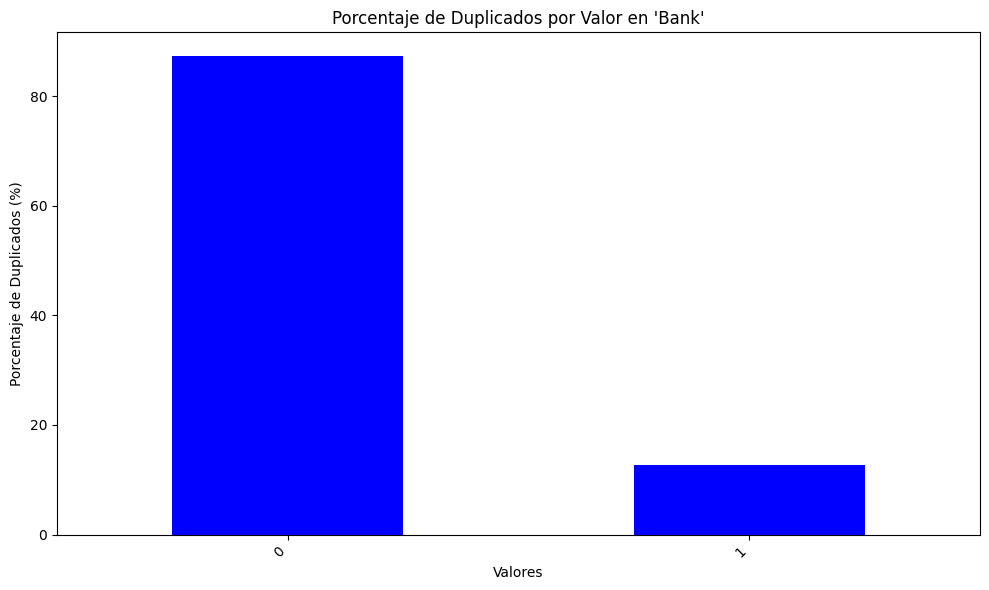

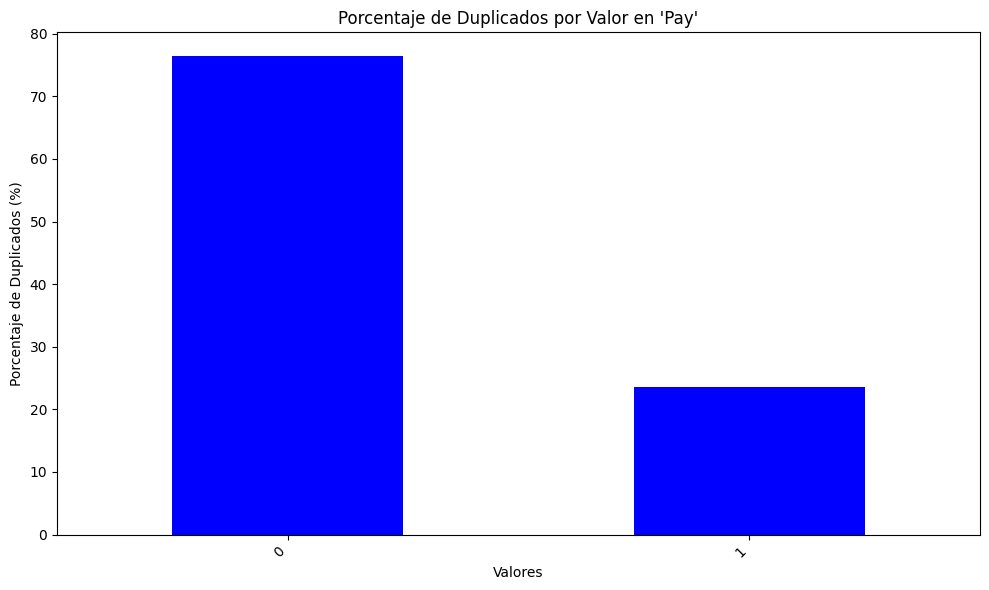

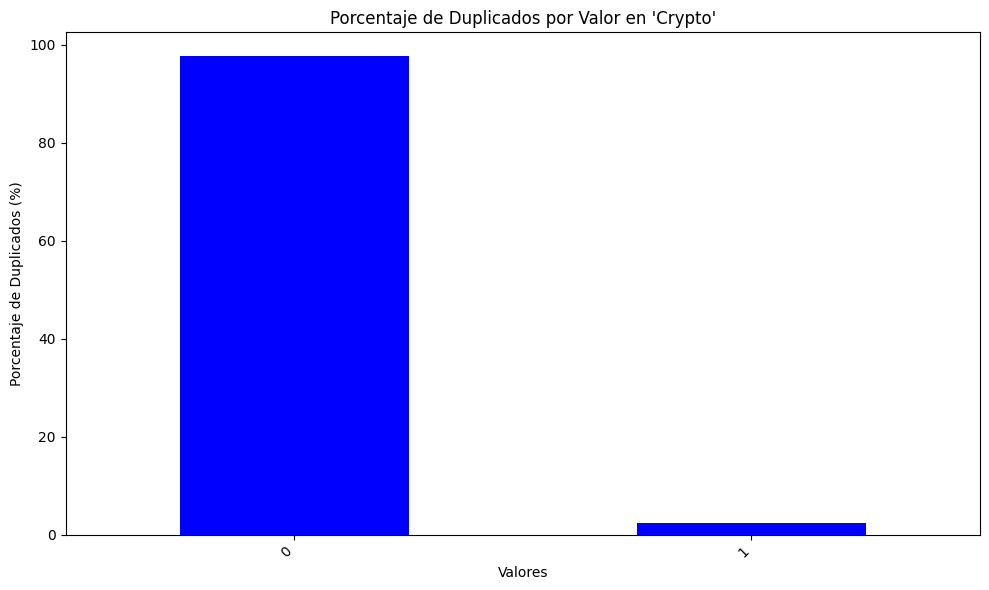

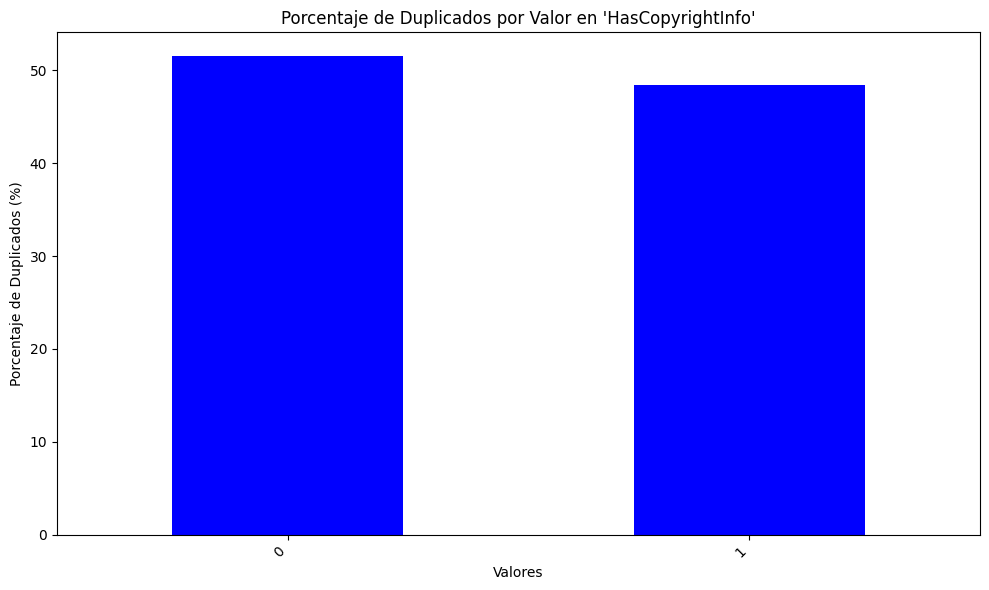

In [11]:
import matplotlib.pyplot as plt

# Lista de columnas relevantes
columnas_revisar = [
    'IsDomainIP', 'TLD', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
    'Robots', 'IsResponsive', 'HasExternalFormSubmit', 'HasSocialNet',
    'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank',
    'Pay', 'Crypto', 'HasCopyrightInfo'
]

# Crear un diccionario para almacenar los resultados
duplicados_por_columna = {}

# Calcular el porcentaje de duplicados para cada valor en cada columna relevante
for column in columnas_revisar:
    columna = df_train[column]
    duplicados_por_valor = columna.value_counts() - 1  # Restar 1 para excluir la primera ocurrencia
    porcentaje_duplicados = (duplicados_por_valor / len(columna)) * 100
    duplicados_por_columna[column] = porcentaje_duplicados[duplicados_por_valor > 0]

# Graficar los resultados
for column, duplicados in duplicados_por_columna.items():
    if not duplicados.empty:  # Solo graficar si hay duplicados
        plt.figure(figsize=(10, 6))
        duplicados.sort_values(ascending=False).plot(kind='bar', color='blue')
        plt.title(f"Porcentaje de Duplicados por Valor en '{column}'")
        plt.xlabel("Valores")
        plt.ylabel("Porcentaje de Duplicados (%)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Distribución Variable Objetivo

C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\386917876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='viridis')


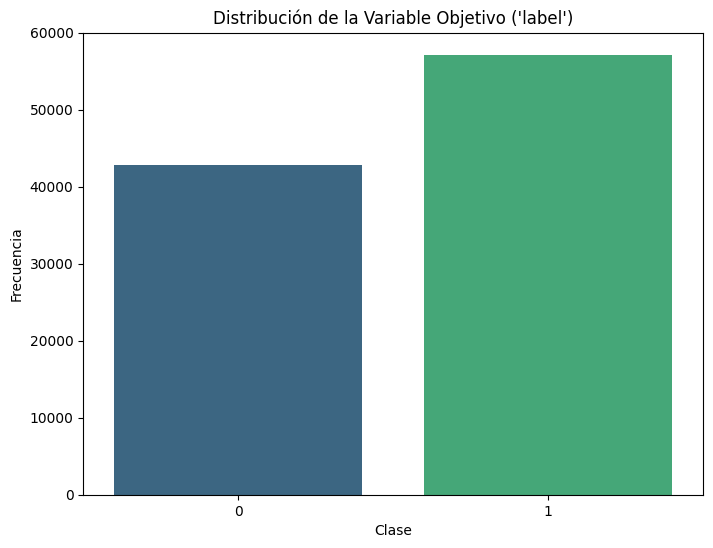

Distribución porcentual de la variable objetivo:
1    57.153
0    42.847
Name: label, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
label_distribution = df_train['label'].value_counts(normalize=True)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train, palette='viridis')
plt.title("Distribución de la Variable Objetivo ('label')")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

print("Distribución porcentual de la variable objetivo:")
print(label_distribution * 100)


## Relacion entre var obj y variables

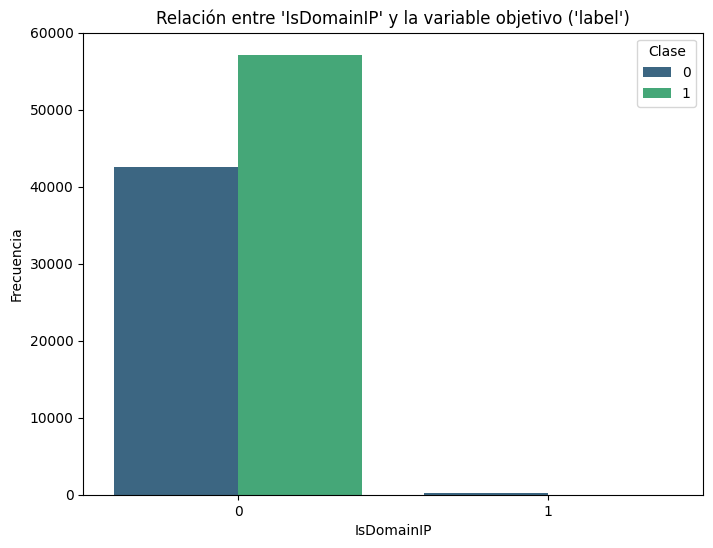

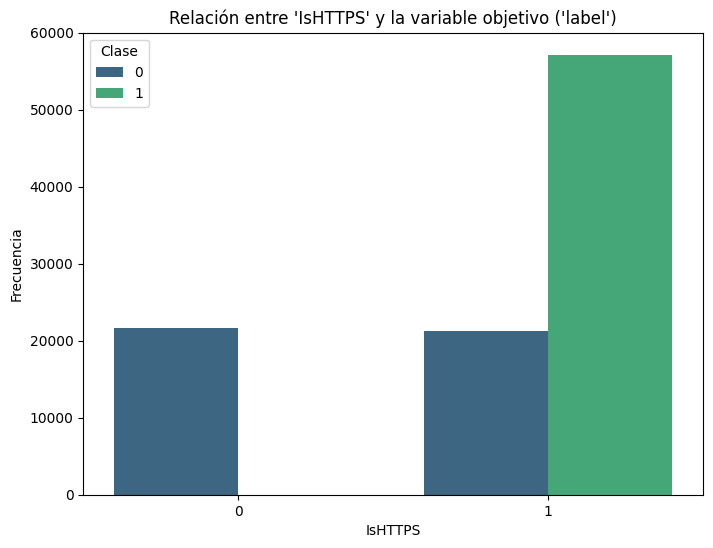

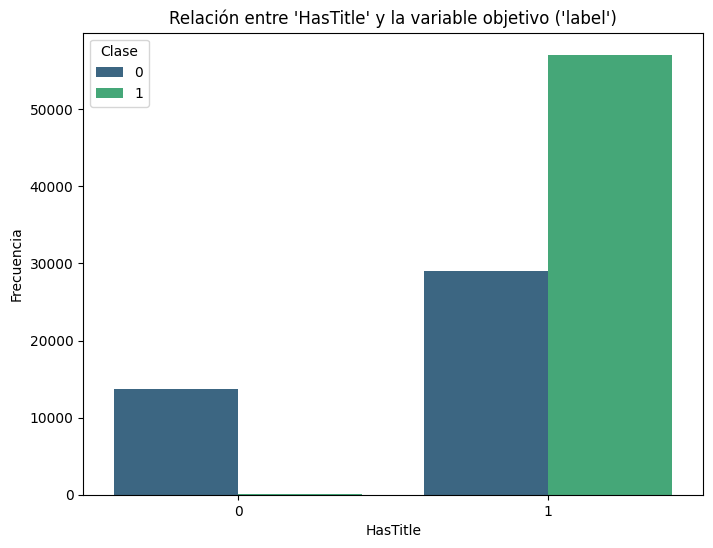

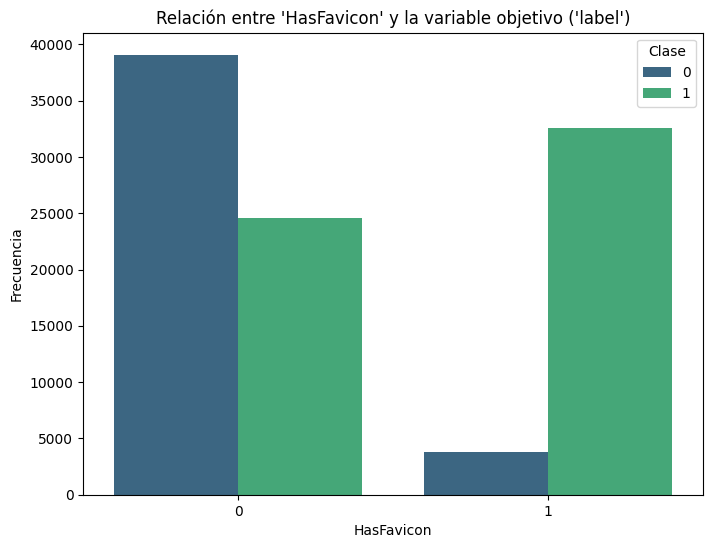

In [13]:
# Relación de variables categóricas con la variable objetivo
categorical_features = ['IsDomainIP', 'IsHTTPS', 'HasTitle', 'HasFavicon']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='label', data=df_train, palette='viridis')
    plt.title(f"Relación entre '{feature}' y la variable objetivo ('label')")
    plt.xlabel(feature)
    plt.ylabel("Frecuencia")
    plt.legend(title="Clase")
    plt.show()


# Outliers

In [19]:
import pandas as pd

# Crear un diccionario para almacenar los outliers detectados
outliers_info = {}

# Detectar columnas numéricas
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Detectar outliers para cada columna numérica
for column in numeric_columns:
    Q1 = df_train[column].quantile(0.25)  # Primer cuartil
    Q3 = df_train[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    
    # Límite inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    outliers = df_train[(df_train[column] < lower_bound) | (df_train[column] > upper_bound)]
    
    # Almacenar información de outliers
    outliers_info[column] = {
        "Número de outliers": len(outliers),
        "Porcentaje de outliers": (len(outliers) / len(df_train)) * 100,
        "Límite inferior": lower_bound,
        "Límite superior": upper_bound
    }

# Crear un DataFrame para visualizar el resultado
outliers_summary = pd.DataFrame(outliers_info).T  # Transponer para mejor formato

# Mostrar resumen en consola
print(outliers_summary)

# Guardar los resultados en un archivo CSV (opcional)
outliers_summary.to_csv("outliers_summary.csv", index=True)


                            Número de outliers  Porcentaje de outliers  \
URLLength                               9689.0                   9.689   
DomainLength                            4782.0                   4.782   
IsDomainIP                               252.0                   0.252   
URLSimilarityIndex                         0.0                   0.000   
CharContinuationRate                     288.0                   0.288   
TLDLegitimateProb                          0.0                   0.000   
URLCharProb                             3285.0                   3.285   
TLDLength                                875.0                   0.875   
NoOfSubDomain                          24372.0                  24.372   
HasObfuscation                           208.0                   0.208   
NoOfObfuscatedChar                       208.0                   0.208   
ObfuscationRatio                         208.0                   0.208   
NoOfLettersInURL                      


Relación entre outliers en 'URLLength' y la variable objetivo ('label'):
label  URLLength_outlier
0      0                    33164
       1                     9683
1      0                    57147
       1                        6
Name: URLLength_outlier, dtype: int64


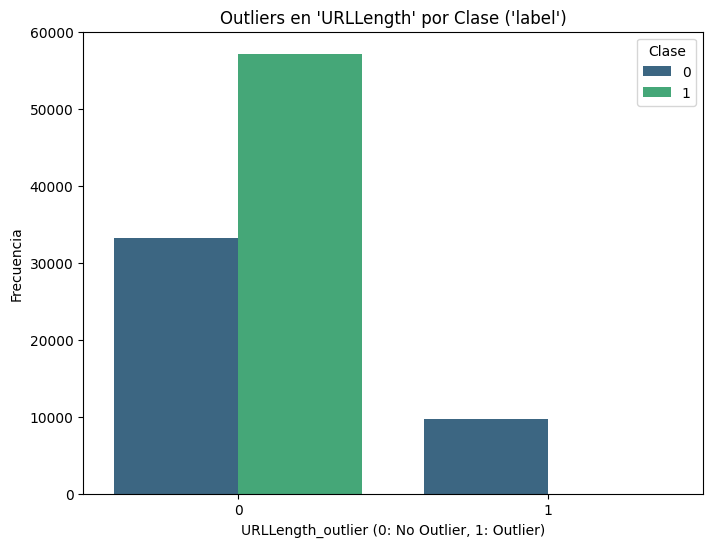


Relación entre outliers en 'DomainLength' y la variable objetivo ('label'):
label  DomainLength_outlier
0      0                       38117
       1                        4730
1      0                       57101
       1                          52
Name: DomainLength_outlier, dtype: int64


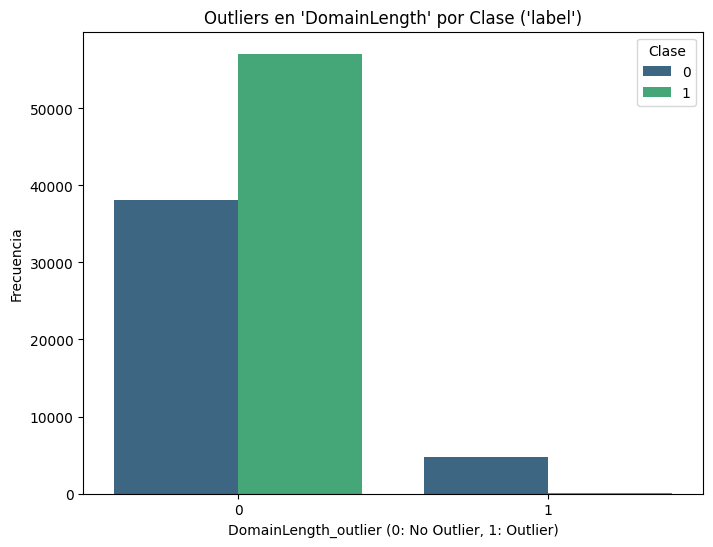


Relación entre outliers en 'IsDomainIP' y la variable objetivo ('label'):
label  IsDomainIP_outlier
0      0                     42595
       1                       252
1      0                     57153
Name: IsDomainIP_outlier, dtype: int64


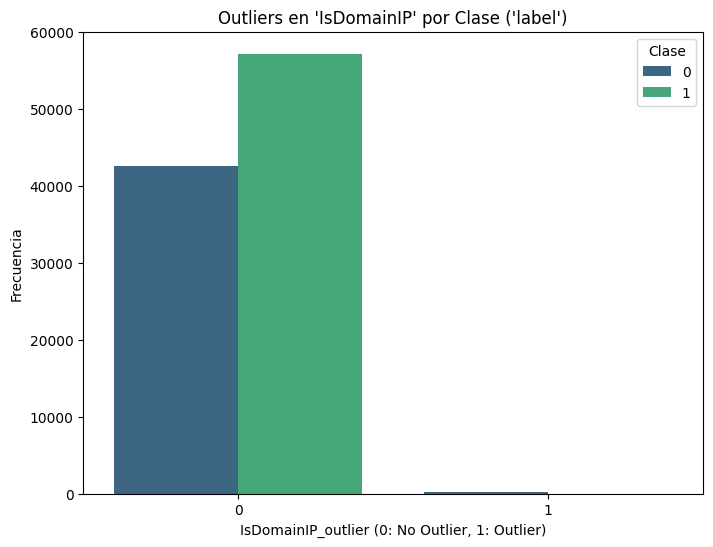


Relación entre outliers en 'URLSimilarityIndex' y la variable objetivo ('label'):
label  URLSimilarityIndex_outlier
0      0                             42847
1      0                             57153
Name: URLSimilarityIndex_outlier, dtype: int64


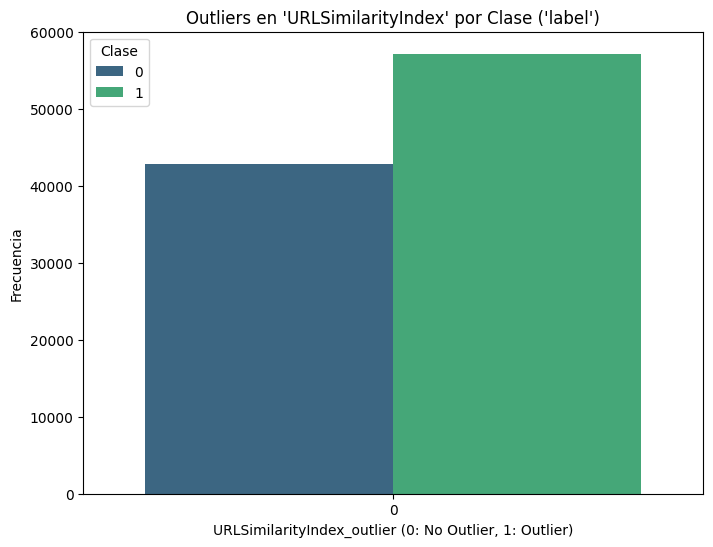


Relación entre outliers en 'CharContinuationRate' y la variable objetivo ('label'):
label  CharContinuationRate_outlier
0      0                               42559
       1                                 288
1      0                               57153
Name: CharContinuationRate_outlier, dtype: int64


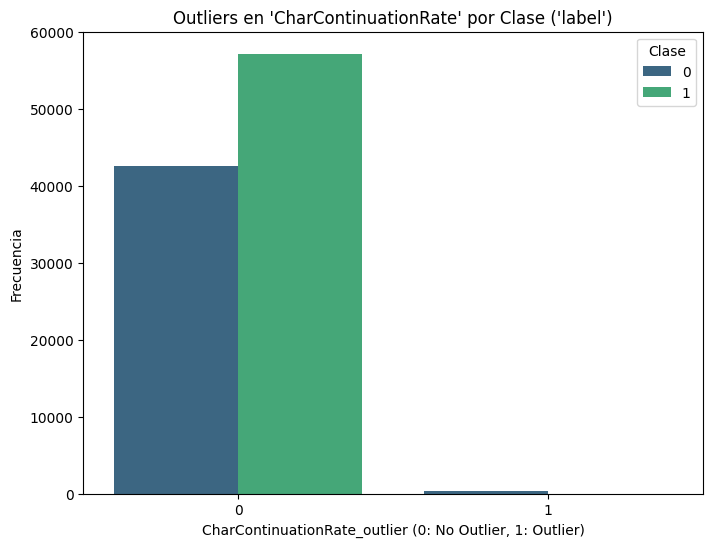


Relación entre outliers en 'TLDLegitimateProb' y la variable objetivo ('label'):
label  TLDLegitimateProb_outlier
0      0                            42847
1      0                            57153
Name: TLDLegitimateProb_outlier, dtype: int64


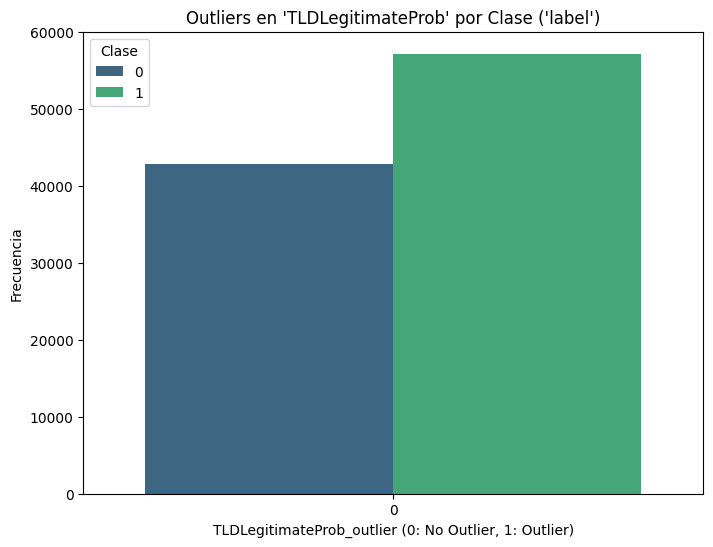


Relación entre outliers en 'URLCharProb' y la variable objetivo ('label'):
label  URLCharProb_outlier
0      0                      39842
       1                       3005
1      0                      56873
       1                        280
Name: URLCharProb_outlier, dtype: int64


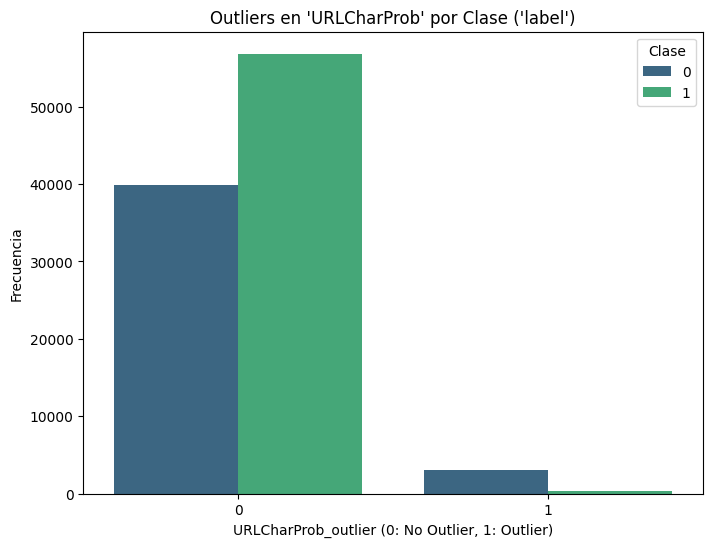


Relación entre outliers en 'TLDLength' y la variable objetivo ('label'):
label  TLDLength_outlier
0      0                    42166
       1                      681
1      0                    56959
       1                      194
Name: TLDLength_outlier, dtype: int64


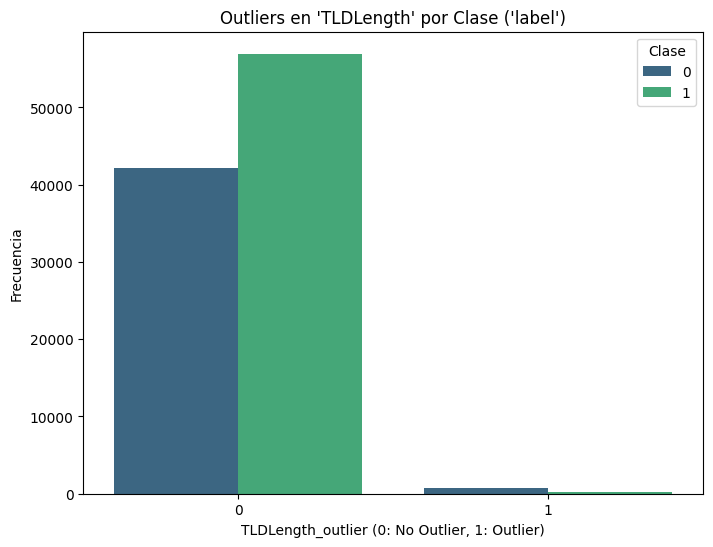


Relación entre outliers en 'NoOfSubDomain' y la variable objetivo ('label'):
label  NoOfSubDomain_outlier
0      0                        26924
       1                        15923
1      0                        48704
       1                         8449
Name: NoOfSubDomain_outlier, dtype: int64


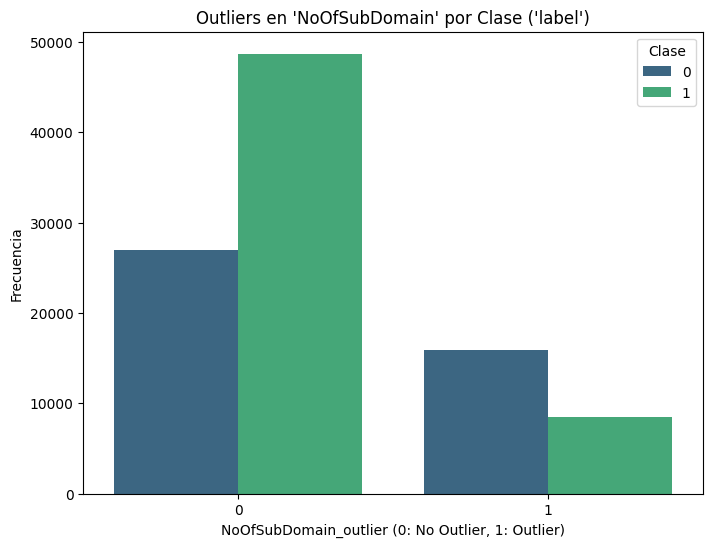


Relación entre outliers en 'HasObfuscation' y la variable objetivo ('label'):
label  HasObfuscation_outlier
0      0                         42639
       1                           208
1      0                         57153
Name: HasObfuscation_outlier, dtype: int64


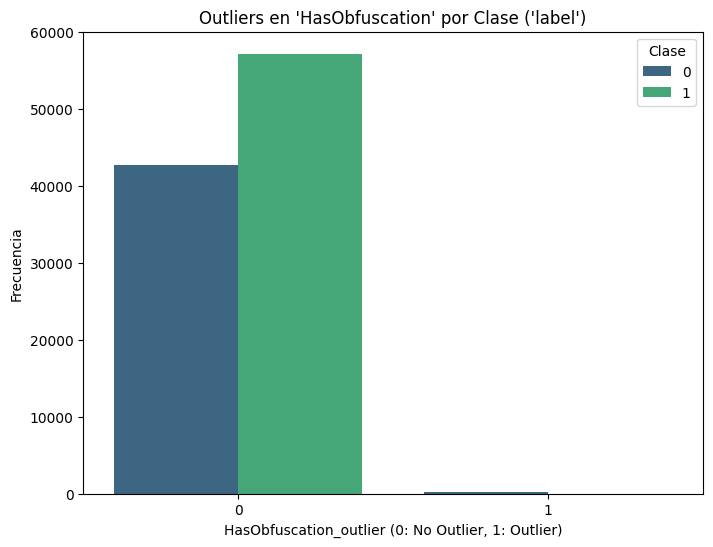


Relación entre outliers en 'NoOfObfuscatedChar' y la variable objetivo ('label'):
label  NoOfObfuscatedChar_outlier
0      0                             42639
       1                               208
1      0                             57153
Name: NoOfObfuscatedChar_outlier, dtype: int64


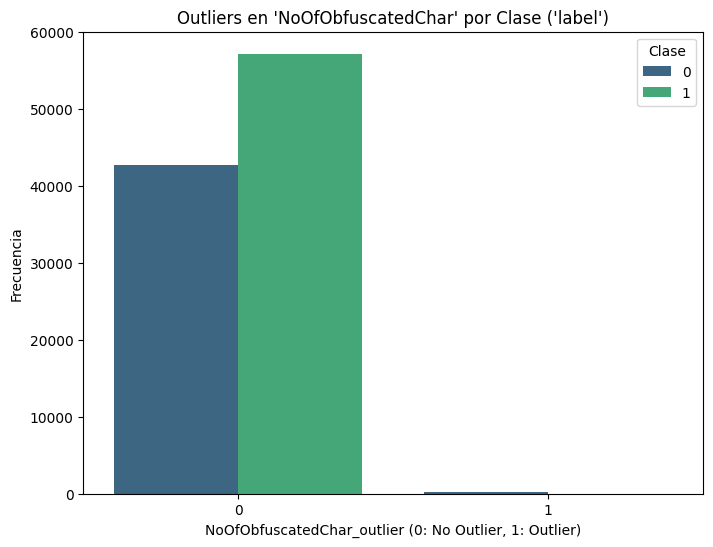


Relación entre outliers en 'ObfuscationRatio' y la variable objetivo ('label'):
label  ObfuscationRatio_outlier
0      0                           42639
       1                             208
1      0                           57153
Name: ObfuscationRatio_outlier, dtype: int64


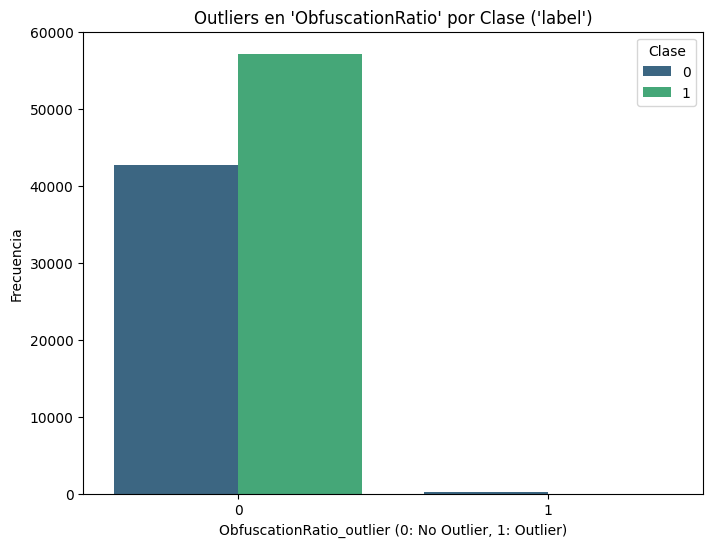


Relación entre outliers en 'NoOfLettersInURL' y la variable objetivo ('label'):
label  NoOfLettersInURL_outlier
0      0                           34554
       1                            8293
1      0                           57147
       1                               6
Name: NoOfLettersInURL_outlier, dtype: int64


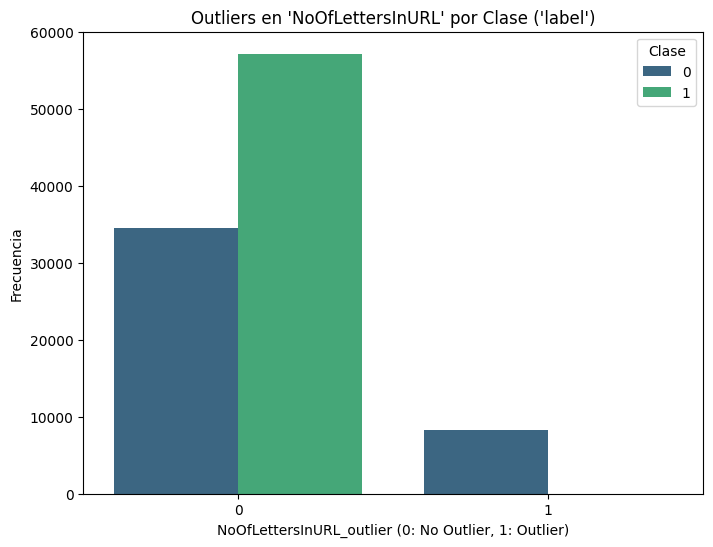


Relación entre outliers en 'LetterRatioInURL' y la variable objetivo ('label'):
label  LetterRatioInURL_outlier
0      0                           42385
       1                             462
1      0                           56985
       1                             168
Name: LetterRatioInURL_outlier, dtype: int64


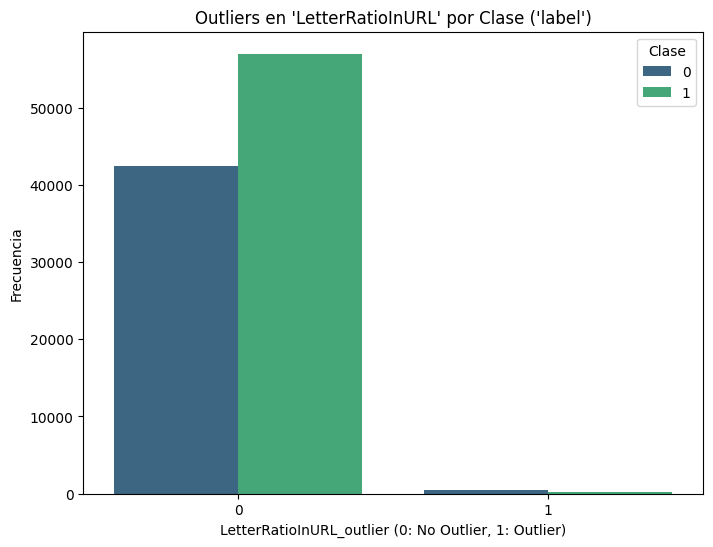


Relación entre outliers en 'NoOfDegitsInURL' y la variable objetivo ('label'):
label  NoOfDegitsInURL_outlier
0      0                          22376
       1                          20471
1      0                          55609
       1                           1544
Name: NoOfDegitsInURL_outlier, dtype: int64


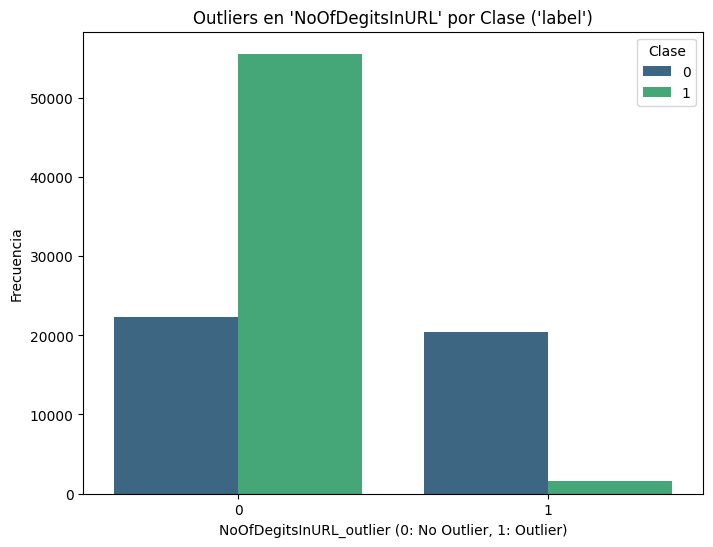


Relación entre outliers en 'DegitRatioInURL' y la variable objetivo ('label'):
label  DegitRatioInURL_outlier
0      0                          22376
       1                          20471
1      0                          55609
       1                           1544
Name: DegitRatioInURL_outlier, dtype: int64


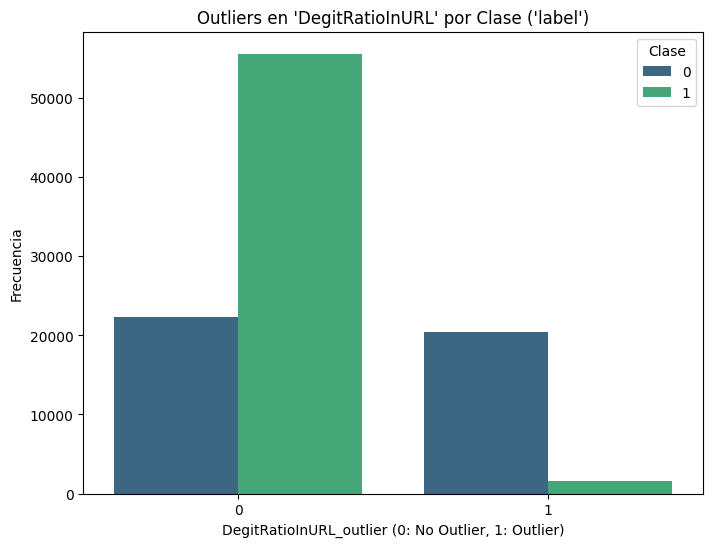


Relación entre outliers en 'NoOfEqualsInURL' y la variable objetivo ('label'):
label  NoOfEqualsInURL_outlier
0      0                          40559
       1                           2288
1      0                          57153
Name: NoOfEqualsInURL_outlier, dtype: int64


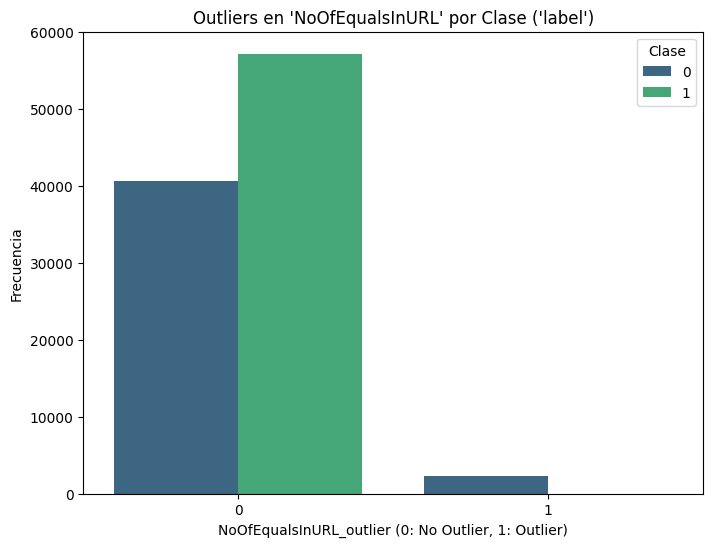


Relación entre outliers en 'NoOfQMarkInURL' y la variable objetivo ('label'):
label  NoOfQMarkInURL_outlier
0      0                         40223
       1                          2624
1      0                         57153
Name: NoOfQMarkInURL_outlier, dtype: int64


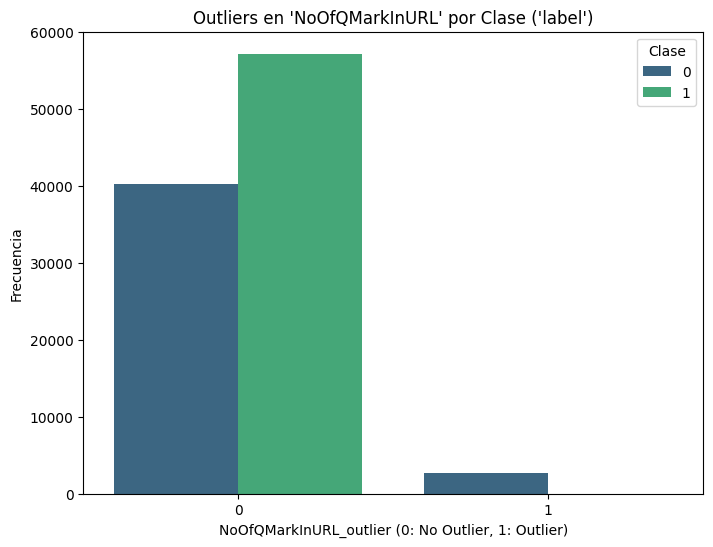


Relación entre outliers en 'NoOfAmpersandInURL' y la variable objetivo ('label'):
label  NoOfAmpersandInURL_outlier
0      0                             42483
       1                               364
1      0                             57153
Name: NoOfAmpersandInURL_outlier, dtype: int64


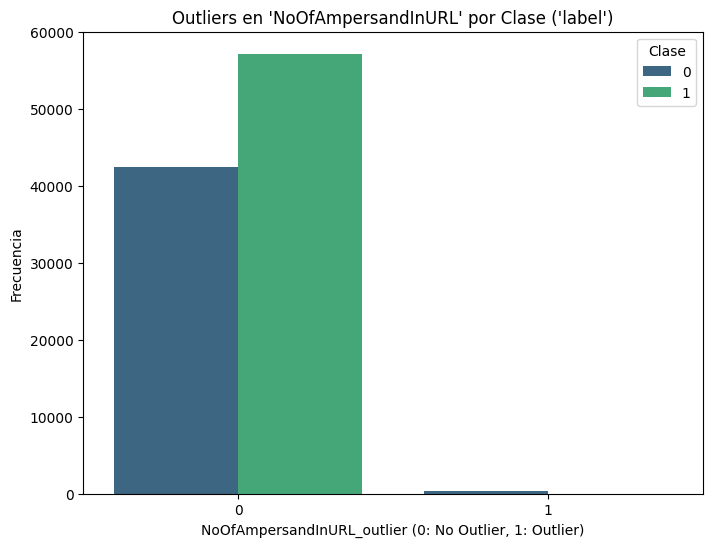


Relación entre outliers en 'NoOfOtherSpecialCharsInURL' y la variable objetivo ('label'):
label  NoOfOtherSpecialCharsInURL_outlier
0      0                                     37599
       1                                      5248
1      0                                     57153
Name: NoOfOtherSpecialCharsInURL_outlier, dtype: int64


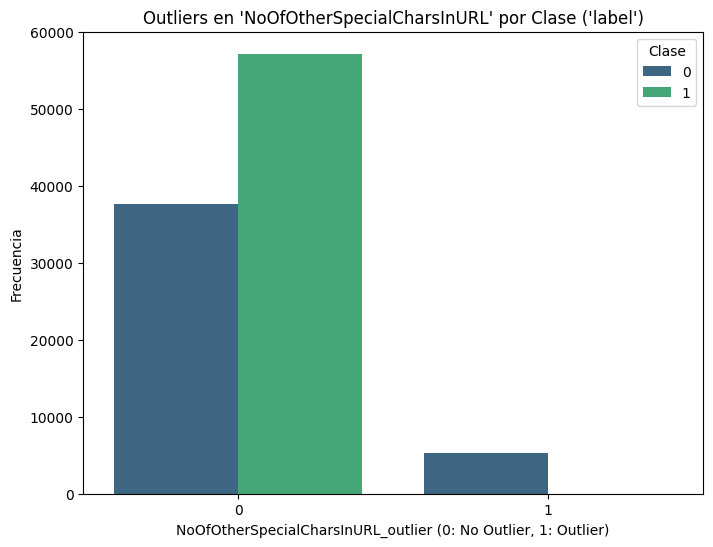


Relación entre outliers en 'SpacialCharRatioInURL' y la variable objetivo ('label'):
label  SpacialCharRatioInURL_outlier
0      0                                41392
       1                                 1455
1      0                                57143
       1                                   10
Name: SpacialCharRatioInURL_outlier, dtype: int64


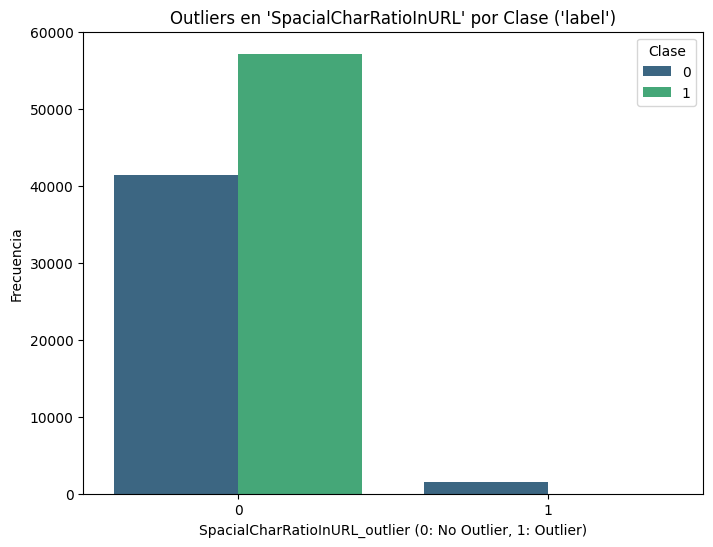


Relación entre outliers en 'IsHTTPS' y la variable objetivo ('label'):
label  IsHTTPS_outlier
0      0                  21208
       1                  21639
1      0                  57153
Name: IsHTTPS_outlier, dtype: int64


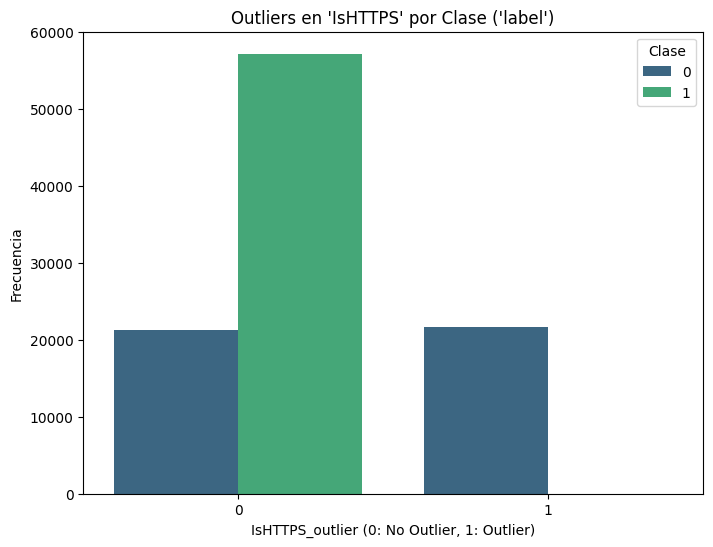


Relación entre outliers en 'LineOfCode' y la variable objetivo ('label'):
label  LineOfCode_outlier
0      0                     42832
       1                        15
1      0                     48938
       1                      8215
Name: LineOfCode_outlier, dtype: int64


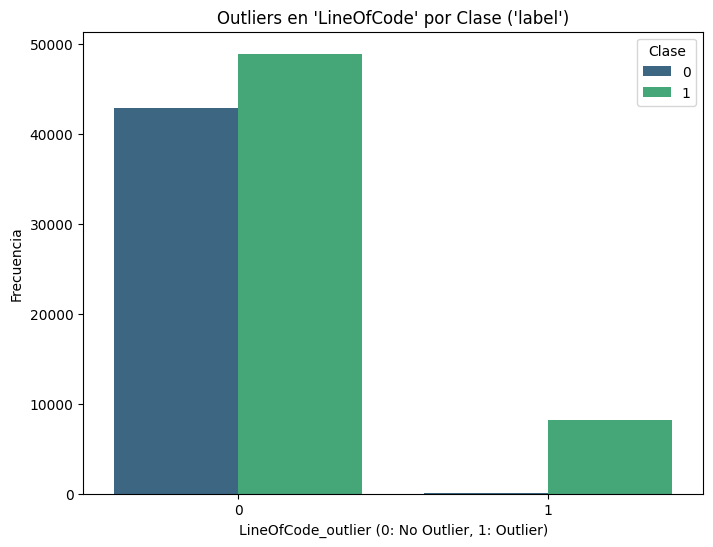


Relación entre outliers en 'LargestLineLength' y la variable objetivo ('label'):
label  LargestLineLength_outlier
0      0                            39947
       1                             2900
1      0                            52696
       1                             4457
Name: LargestLineLength_outlier, dtype: int64


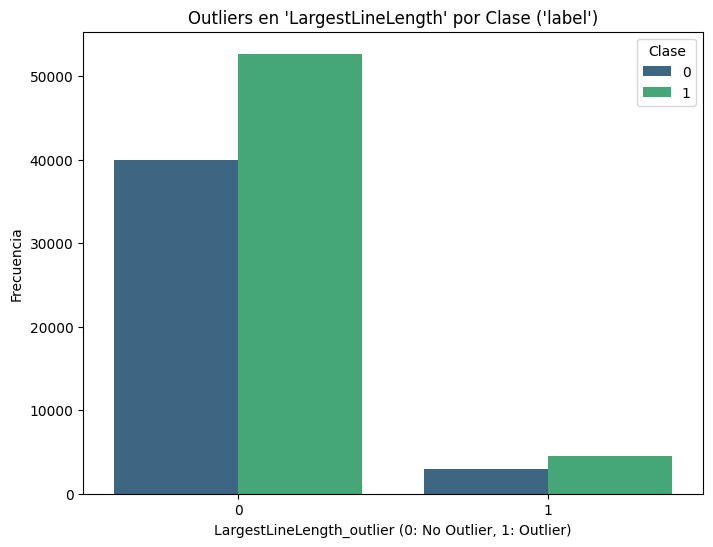


Relación entre outliers en 'HasTitle' y la variable objetivo ('label'):
label  HasTitle_outlier
0      0                   29071
       1                   13776
1      0                   57076
       1                      77
Name: HasTitle_outlier, dtype: int64


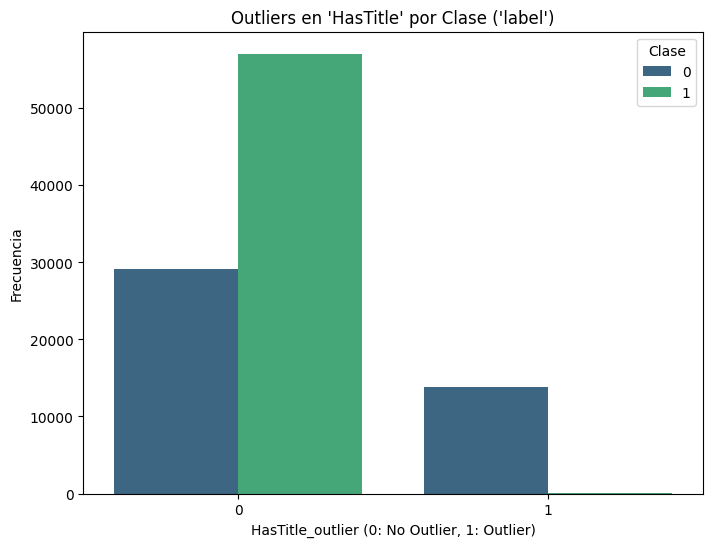


Relación entre outliers en 'DomainTitleMatchScore' y la variable objetivo ('label'):
label  DomainTitleMatchScore_outlier
0      0                                42847
1      0                                57153
Name: DomainTitleMatchScore_outlier, dtype: int64


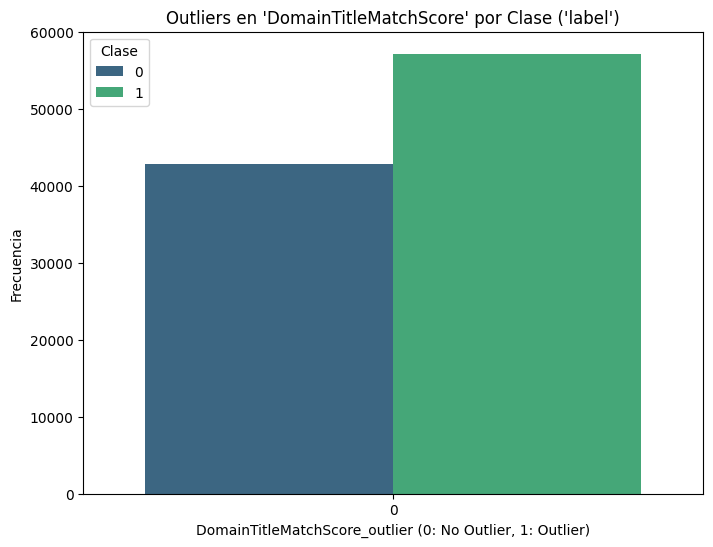


Relación entre outliers en 'URLTitleMatchScore' y la variable objetivo ('label'):
label  URLTitleMatchScore_outlier
0      0                             42847
1      0                             57153
Name: URLTitleMatchScore_outlier, dtype: int64


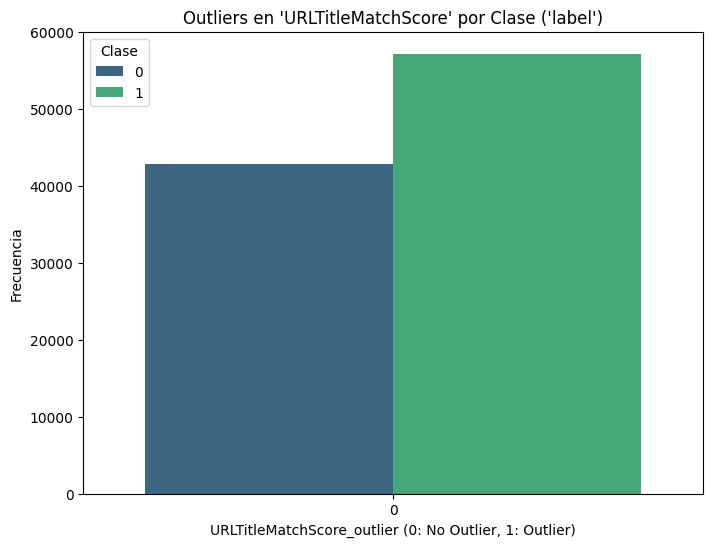


Relación entre outliers en 'HasFavicon' y la variable objetivo ('label'):
label  HasFavicon_outlier
0      0                     42847
1      0                     57153
Name: HasFavicon_outlier, dtype: int64


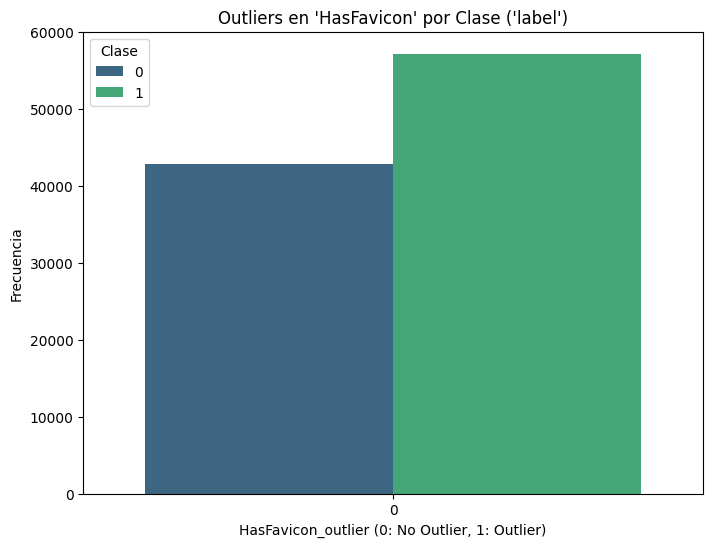


Relación entre outliers en 'Robots' y la variable objetivo ('label'):
label  Robots_outlier
0      0                 42847
1      0                 57153
Name: Robots_outlier, dtype: int64


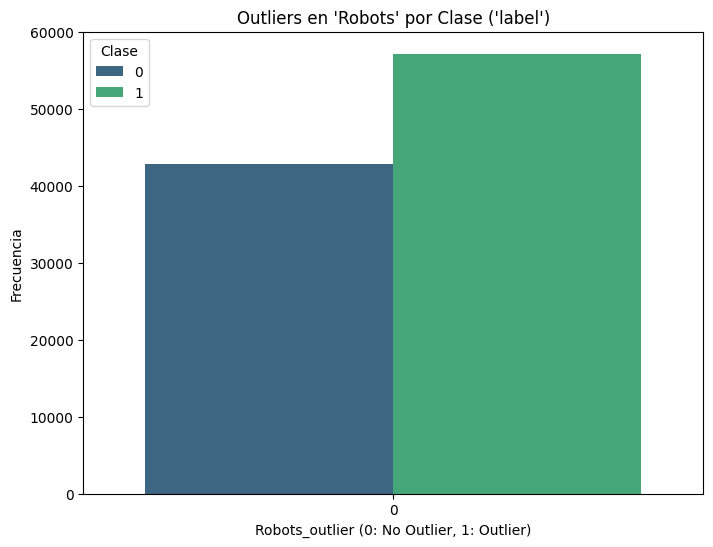


Relación entre outliers en 'IsResponsive' y la variable objetivo ('label'):
label  IsResponsive_outlier
0      0                       42847
1      0                       57153
Name: IsResponsive_outlier, dtype: int64


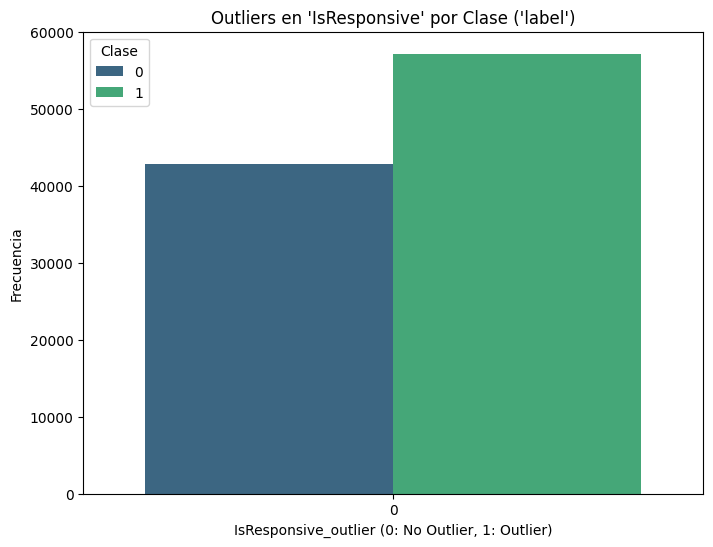


Relación entre outliers en 'NoOfURLRedirect' y la variable objetivo ('label'):
label  NoOfURLRedirect_outlier
0      0                          36380
       1                           6467
1      0                          50319
       1                           6834
Name: NoOfURLRedirect_outlier, dtype: int64


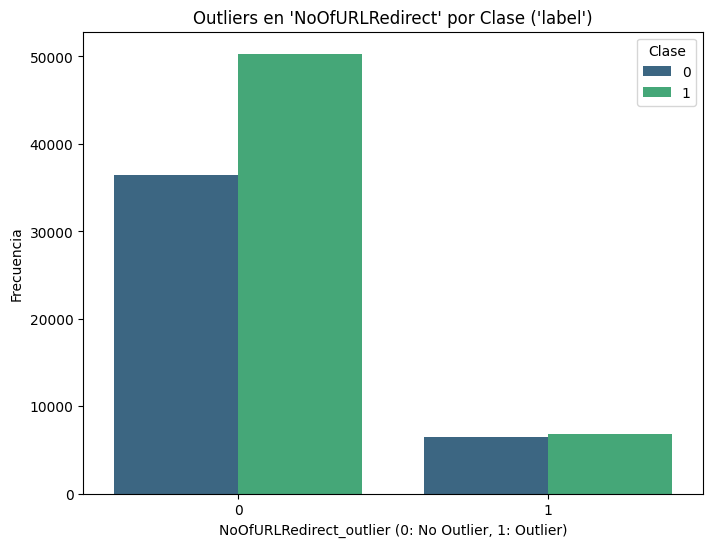


Relación entre outliers en 'NoOfSelfRedirect' y la variable objetivo ('label'):
label  NoOfSelfRedirect_outlier
0      0                           40364
       1                            2483
1      0                           55584
       1                            1569
Name: NoOfSelfRedirect_outlier, dtype: int64


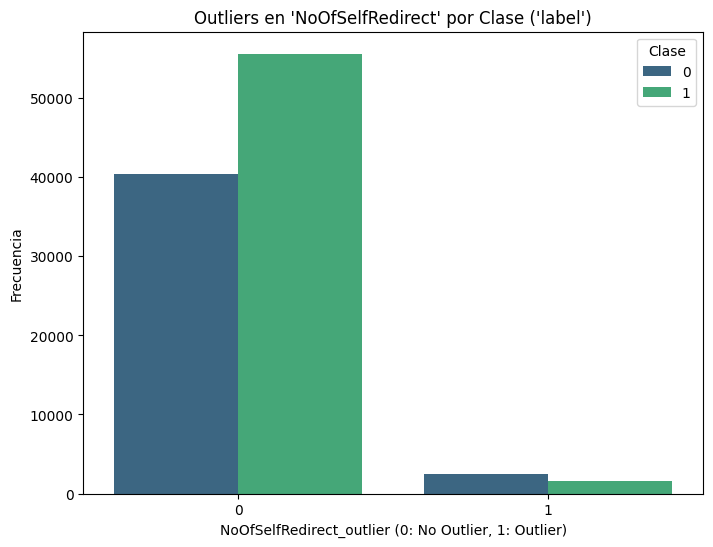


Relación entre outliers en 'HasDescription' y la variable objetivo ('label'):
label  HasDescription_outlier
0      0                         42847
1      0                         57153
Name: HasDescription_outlier, dtype: int64


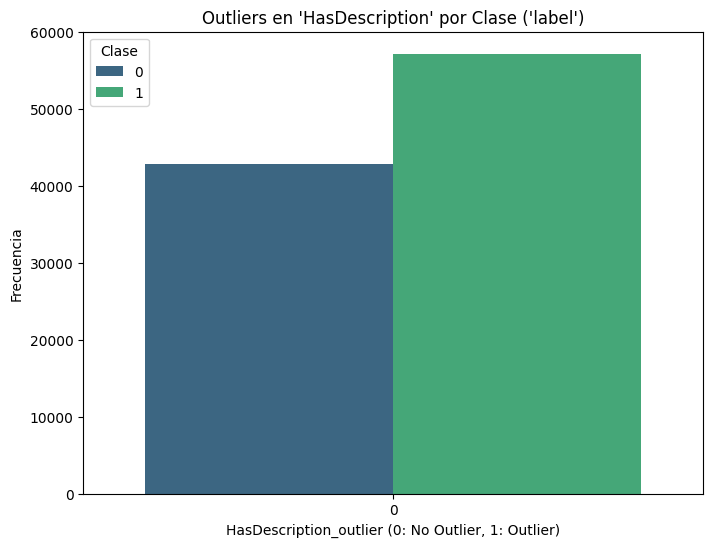


Relación entre outliers en 'NoOfPopup' y la variable objetivo ('label'):
label  NoOfPopup_outlier
0      0                    42605
       1                      242
1      0                    51697
       1                     5456
Name: NoOfPopup_outlier, dtype: int64


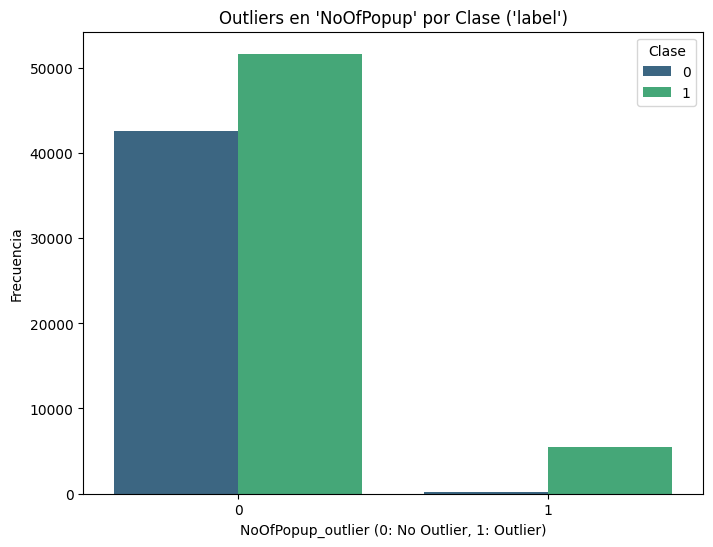


Relación entre outliers en 'NoOfiFrame' y la variable objetivo ('label'):
label  NoOfiFrame_outlier
0      0                     42619
       1                       228
1      0                     42722
       1                     14431
Name: NoOfiFrame_outlier, dtype: int64


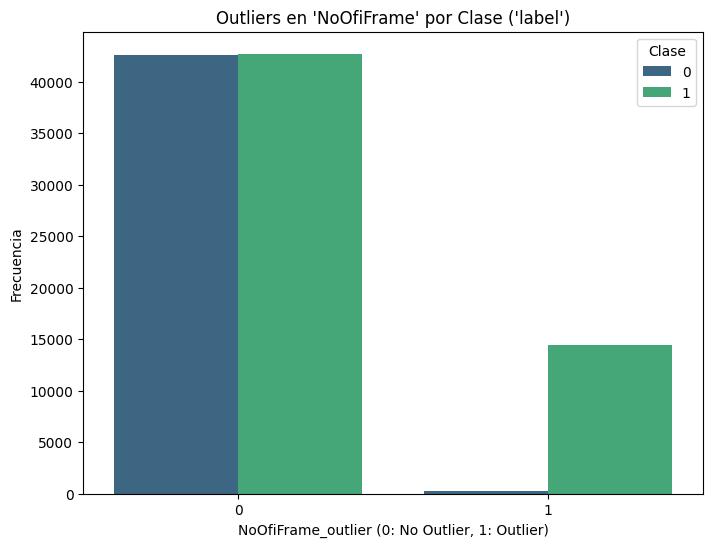


Relación entre outliers en 'HasExternalFormSubmit' y la variable objetivo ('label'):
label  HasExternalFormSubmit_outlier
0      0                                42663
       1                                  184
1      0                                52979
       1                                 4174
Name: HasExternalFormSubmit_outlier, dtype: int64


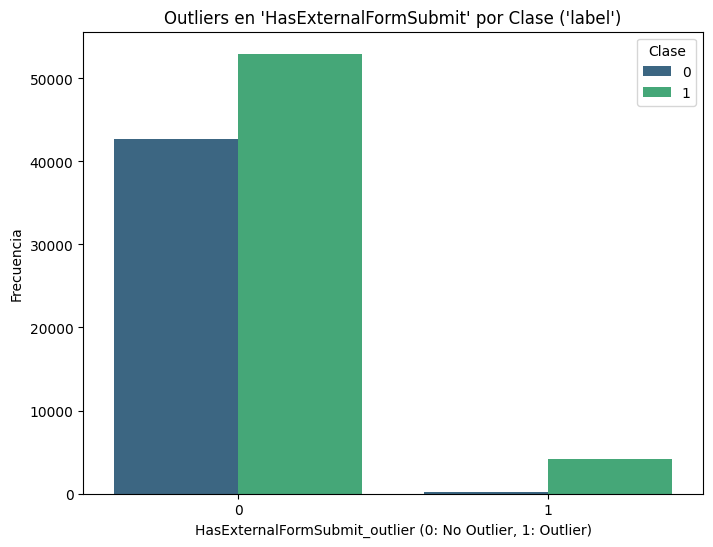


Relación entre outliers en 'HasSocialNet' y la variable objetivo ('label'):
label  HasSocialNet_outlier
0      0                       42847
1      0                       57153
Name: HasSocialNet_outlier, dtype: int64


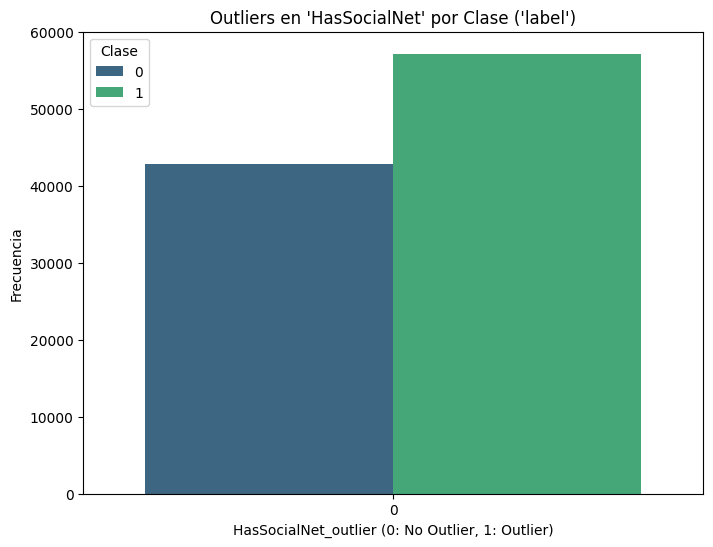


Relación entre outliers en 'HasSubmitButton' y la variable objetivo ('label'):
label  HasSubmitButton_outlier
0      0                          42847
1      0                          57153
Name: HasSubmitButton_outlier, dtype: int64


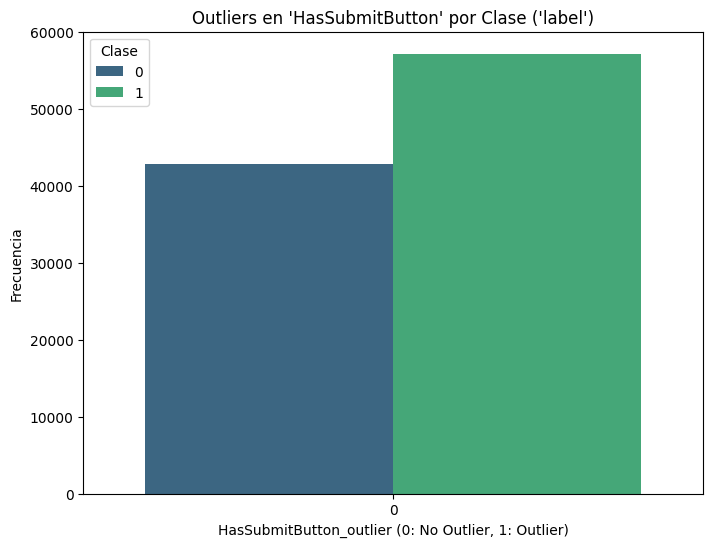


Relación entre outliers en 'HasHiddenFields' y la variable objetivo ('label'):
label  HasHiddenFields_outlier
0      0                          42847
1      0                          57153
Name: HasHiddenFields_outlier, dtype: int64


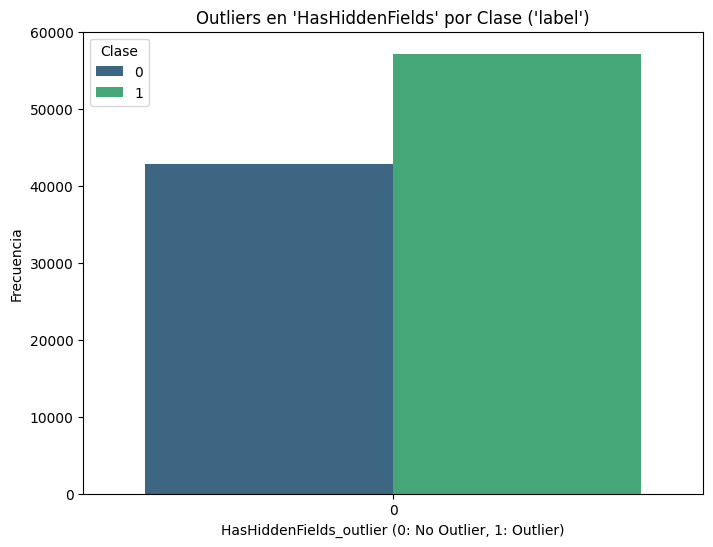


Relación entre outliers en 'HasPasswordField' y la variable objetivo ('label'):
label  HasPasswordField_outlier
0      0                           40539
       1                            2308
1      0                           49299
       1                            7854
Name: HasPasswordField_outlier, dtype: int64


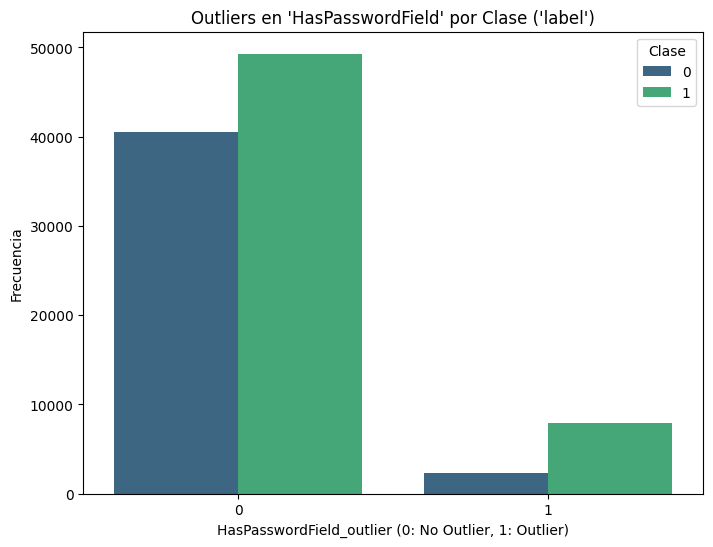


Relación entre outliers en 'Bank' y la variable objetivo ('label'):
label  Bank_outlier
0      0               40492
       1                2355
1      0               46761
       1               10392
Name: Bank_outlier, dtype: int64


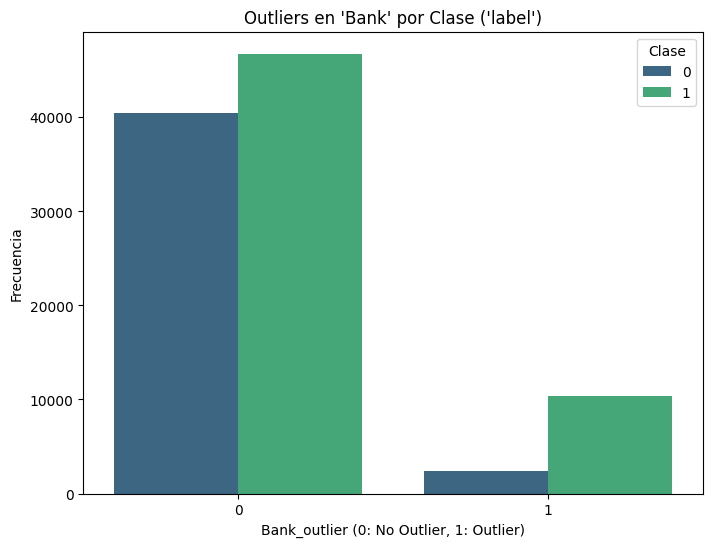


Relación entre outliers en 'Pay' y la variable objetivo ('label'):
label  Pay_outlier
0      0              40260
       1               2587
1      0              36140
       1              21013
Name: Pay_outlier, dtype: int64


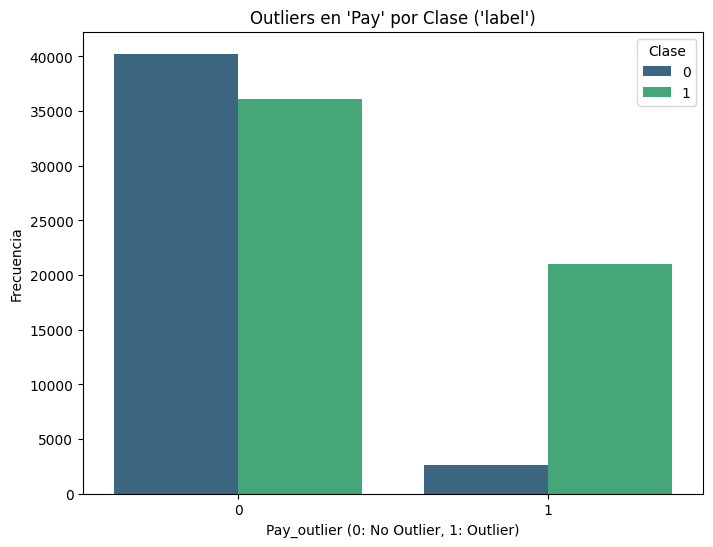


Relación entre outliers en 'Crypto' y la variable objetivo ('label'):
label  Crypto_outlier
0      0                 42594
       1                   253
1      0                 55024
       1                  2129
Name: Crypto_outlier, dtype: int64


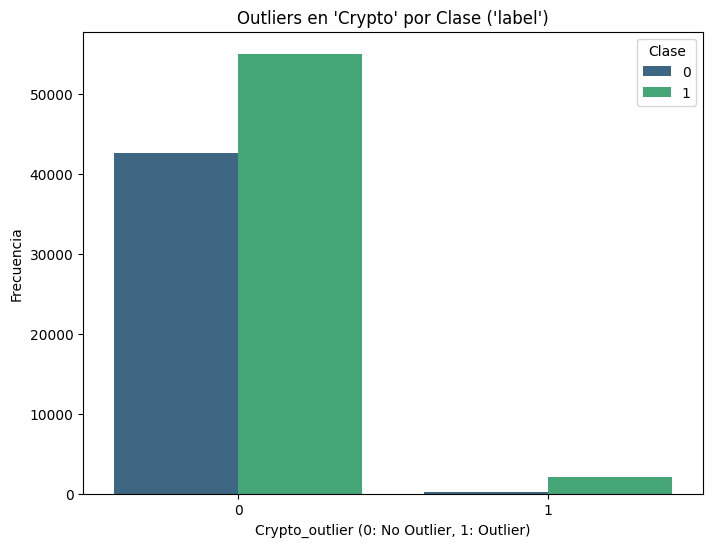


Relación entre outliers en 'HasCopyrightInfo' y la variable objetivo ('label'):
label  HasCopyrightInfo_outlier
0      0                           42847
1      0                           57153
Name: HasCopyrightInfo_outlier, dtype: int64


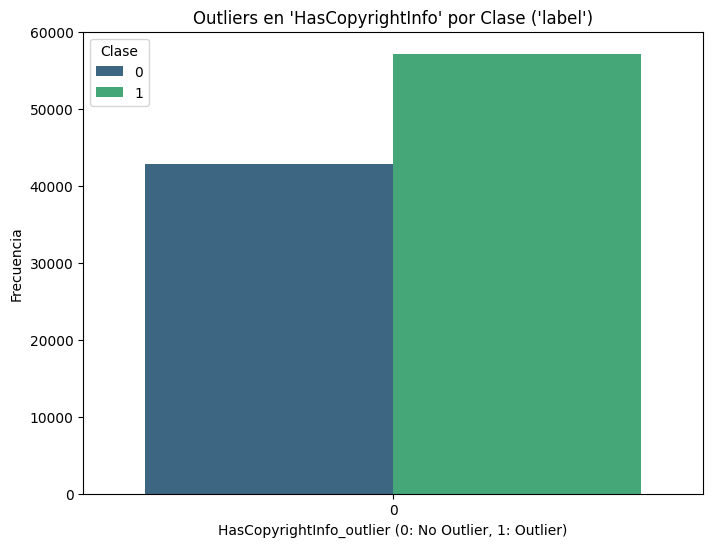


Relación entre outliers en 'NoOfImage' y la variable objetivo ('label'):
label  NoOfImage_outlier
0      0                    42846
       1                        1
1      0                    49422
       1                     7731
Name: NoOfImage_outlier, dtype: int64


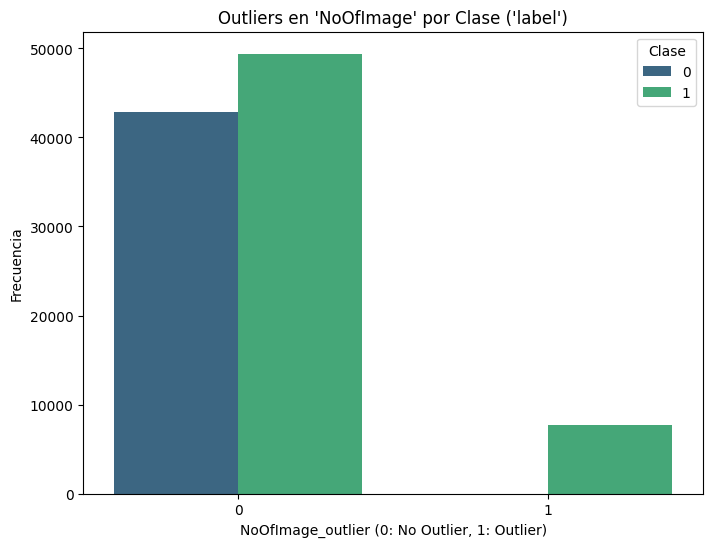


Relación entre outliers en 'NoOfCSS' y la variable objetivo ('label'):
label  NoOfCSS_outlier
0      0                  42813
       1                     34
1      0                  47533
       1                   9620
Name: NoOfCSS_outlier, dtype: int64


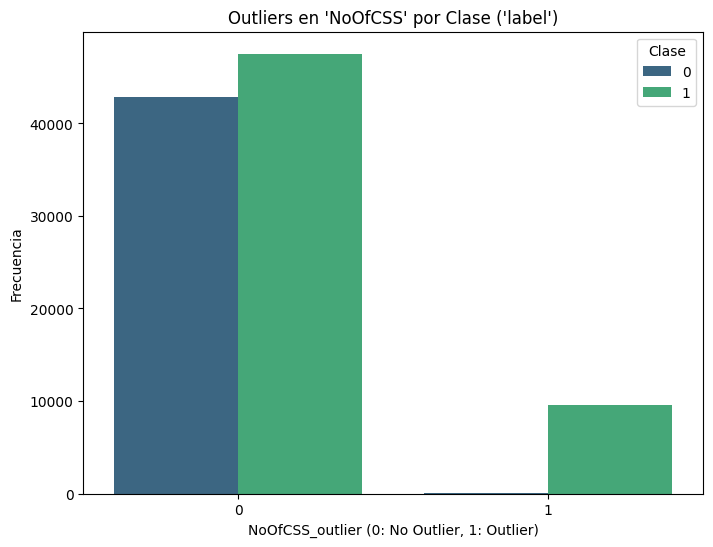


Relación entre outliers en 'NoOfJS' y la variable objetivo ('label'):
label  NoOfJS_outlier
0      0                 42765
       1                    82
1      0                 52162
       1                  4991
Name: NoOfJS_outlier, dtype: int64


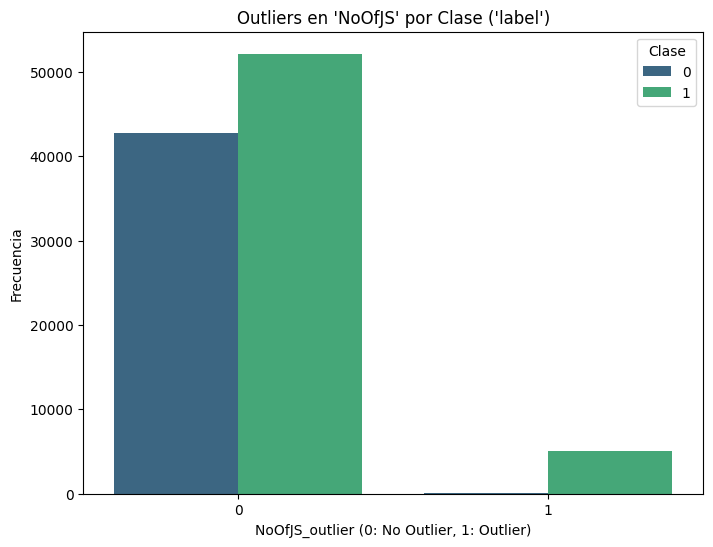


Relación entre outliers en 'NoOfSelfRef' y la variable objetivo ('label'):
label  NoOfSelfRef_outlier
0      0                      42847
1      0                      50458
       1                       6695
Name: NoOfSelfRef_outlier, dtype: int64


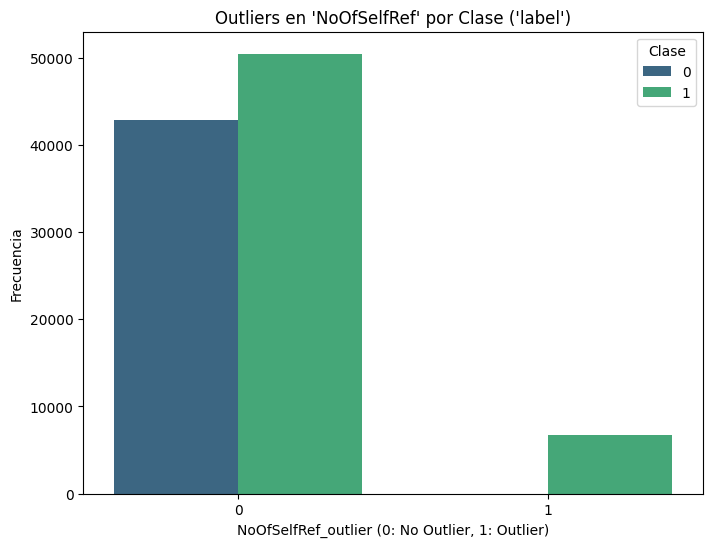


Relación entre outliers en 'NoOfEmptyRef' y la variable objetivo ('label'):
label  NoOfEmptyRef_outlier
0      0                       42321
       1                         526
1      0                       41245
       1                       15908
Name: NoOfEmptyRef_outlier, dtype: int64


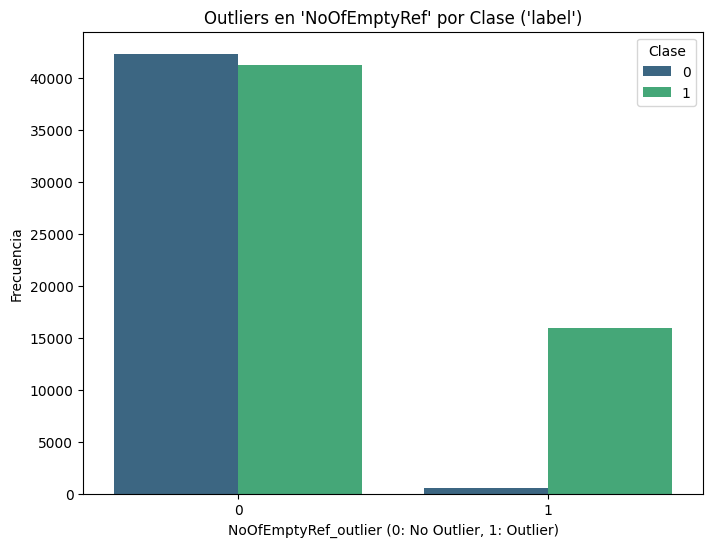


Relación entre outliers en 'NoOfExternalRef' y la variable objetivo ('label'):
label  NoOfExternalRef_outlier
0      0                          42846
       1                              1
1      0                          47587
       1                           9566
Name: NoOfExternalRef_outlier, dtype: int64


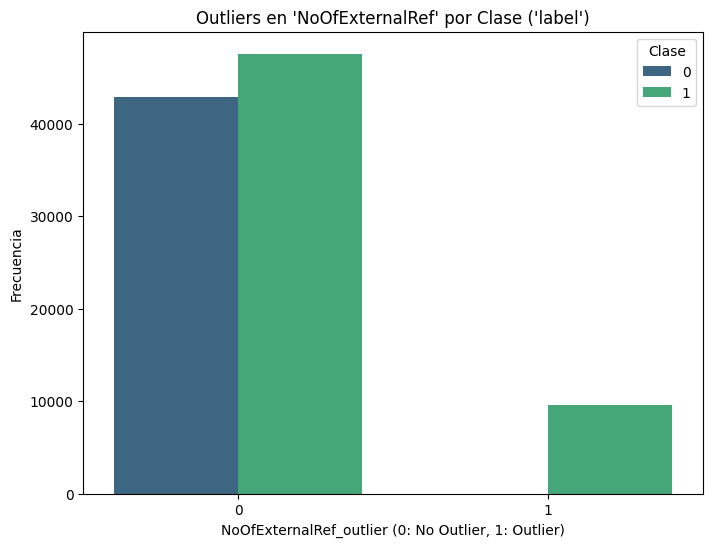


Relación entre outliers en 'label' y la variable objetivo ('label'):
label  label_outlier
0      0                42847
1      0                57153
Name: label_outlier, dtype: int64


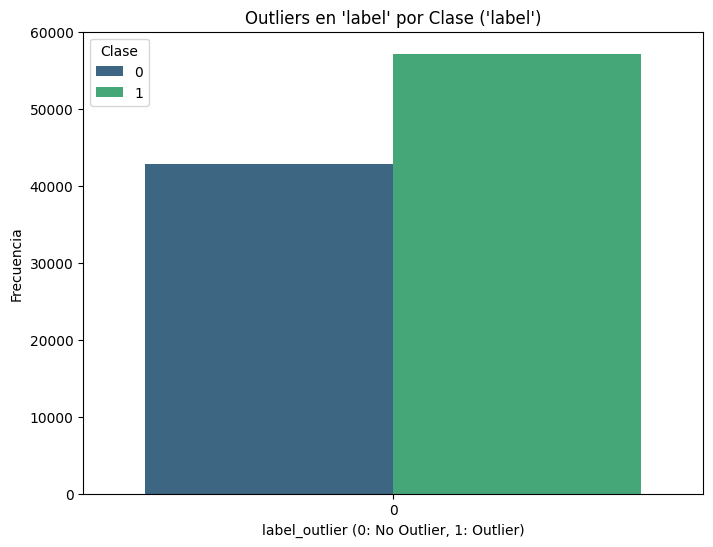

In [20]:
# Crear una copia para análisis de outliers
df_outliers = df_train.copy()

# Agregar una columna para marcar outliers por cada característica numérica
for column in numeric_columns:
    Q1 = df_train[column].quantile(0.25)
    Q3 = df_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Marcar valores fuera del rango como outliers (1) y no outliers (0)
    df_outliers[f'{column}_outlier'] = ((df_train[column] < lower_bound) | 
                                        (df_train[column] > upper_bound)).astype(int)

# Analizar la relación entre los outliers y la variable objetivo
for column in numeric_columns:
    outlier_col = f'{column}_outlier'
    print(f"\nRelación entre outliers en '{column}' y la variable objetivo ('label'):")
    print(df_outliers.groupby(['label', outlier_col])[outlier_col].count())

    # Visualizar con gráficos
    plt.figure(figsize=(8, 6))
    sns.countplot(x=outlier_col, hue='label', data=df_outliers, palette='viridis')
    plt.title(f"Outliers en '{column}' por Clase ('label')")
    plt.xlabel(f"{column}_outlier (0: No Outlier, 1: Outlier)")
    plt.ylabel("Frecuencia")
    plt.legend(title="Clase")
    plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Crear un transformador para codificar columnas categóricas
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Mantener las columnas numéricas sin cambios
)

# Transformar X con One-Hot Encoding
X_encoded = column_transformer.fit_transform(X)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dividir los datos codificados
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred = model.predict(X_test)
print("Resultados del modelo:")
print(classification_report(y_test, y_pred))



Columnas categóricas: Index(['TLD'], dtype='object')


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [22]:
# Revisar outliers específicos en una característica clave
feature = 'NoOfDegitsInURL'
Q1 = df_train[feature].quantile(0.25)
Q3 = df_train[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_train[(df_train[feature] < lower_bound) | (df_train[feature] > upper_bound)]
print(f"Valores extremos en '{feature}':")
print(outliers[[feature, 'label']])


Valores extremos en 'NoOfDegitsInURL':
       NoOfDegitsInURL  label
2                   10      0
10                   3      0
16                   2      0
18                   6      0
20                   1      1
...                ...    ...
99991                3      0
99995                1      0
99996                7      0
99997                4      0
99998                5      0

[22015 rows x 2 columns]
